In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import poisson

In [2]:
df = pd.read_csv('/content/sample_data/euro2024_players.csv',sep=',',)
df.head()

,Name,Position,Age,Club,Height,Foot,Caps,Goals,MarketValue,Country
0,Marc-André ter Stegen,Goalkeeper,32,FC Barcelona,187,right,40,0,28000000,Germany
1,Manuel Neuer,Goalkeeper,38,Bayern Munich,193,right,119,0,4000000,Germany
2,Oliver Baumann,Goalkeeper,34,TSG 1899 Hoffenheim,187,right,0,0,3000000,Germany
3,Nico Schlotterbeck,Centre-Back,24,Borussia Dortmund,191,left,12,0,40000000,Germany
4,Jonathan Tah,Centre-Back,28,Bayer 04 Leverkusen,195,right,25,0,30000000,Germany


In [3]:
print(df.dtypes)

Name           object
Position       object
Age             int64
Club           object
Height          int64
Foot           object
Caps            int64
Goals           int64
MarketValue     int64
Country        object
dtype: object


In [4]:
df.shape

(623, 10)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 623 entries, 0 to 622
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Name         623 non-null    object
 1   Position     623 non-null    object
 2   Age          623 non-null    int64 
 3   Club         623 non-null    object
 4   Height       623 non-null    int64 
 5   Foot         620 non-null    object
 6   Caps         623 non-null    int64 
 7   Goals        623 non-null    int64 
 8   MarketValue  623 non-null    int64 
 9   Country      623 non-null    object
dtypes: int64(5), object(5)
memory usage: 48.8+ KB


In [6]:
df.isna().sum()

Name           0
Position       0
Age            0
Club           0
Height         0
Foot           3
Caps           0
Goals          0
MarketValue    0
Country        0
dtype: int64

In [7]:
for col in df.columns:
  missing_values = np.mean(df[col].isnull())
  print('{} - {}%'.format(col, round(missing_values * 100)))

Name - 0%
Position - 0%
Age - 0%
Club - 0%
Height - 0%
Foot - 0%
Caps - 0%
Goals - 0%
MarketValue - 0%
Country - 0%


In [8]:
df = df.rename(columns={'Club': 'Клуб'}, inplace=False)
df = df.rename(columns={'Name': 'Имя'}, inplace=False)
df = df.rename(columns={'Position': 'Позиция'}, inplace=False)
df = df.rename(columns={'Age': 'Возраст'}, inplace=False)
df = df.rename(columns={'Height': 'Рост'}, inplace=False)
df = df.rename(columns={'Foot': 'Рабочая нога'}, inplace=False)
df = df.rename(columns={'Caps': 'Матчи'}, inplace=False)
df = df.rename(columns={'Goals': 'Голы'}, inplace=False)
df = df.rename(columns={'MarketValue': 'Цена на трансферном рынке'}, inplace=False)
df = df.rename(columns={'Country': 'Страна'}, inplace=False)

In [9]:
df.head()

,Имя,Позиция,Возраст,Клуб,Рост,Рабочая нога,Матчи,Голы,Цена на трансферном рынке,Страна
0,Marc-André ter Stegen,Goalkeeper,32,FC Barcelona,187,right,40,0,28000000,Germany
1,Manuel Neuer,Goalkeeper,38,Bayern Munich,193,right,119,0,4000000,Germany
2,Oliver Baumann,Goalkeeper,34,TSG 1899 Hoffenheim,187,right,0,0,3000000,Germany
3,Nico Schlotterbeck,Centre-Back,24,Borussia Dortmund,191,left,12,0,40000000,Germany
4,Jonathan Tah,Centre-Back,28,Bayer 04 Leverkusen,195,right,25,0,30000000,Germany


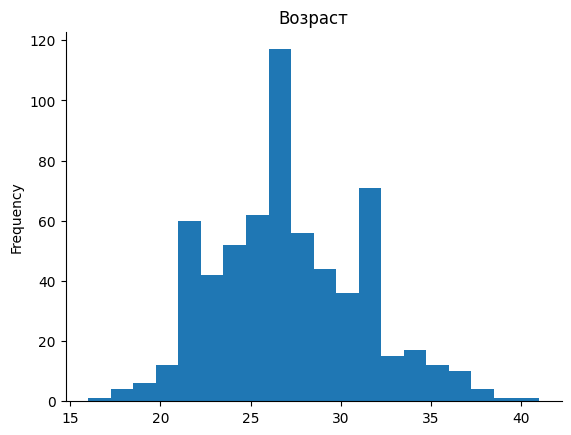

In [10]:
from matplotlib import pyplot as plt
df['Возраст'].plot(kind='hist', bins=20, title='Возраст')
plt.gca().spines[['top', 'right',]].set_visible(False)

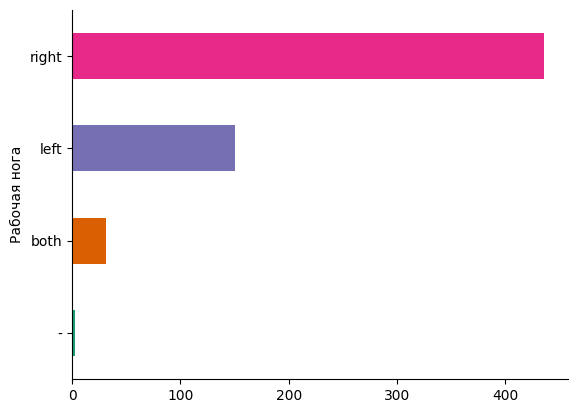

In [11]:
from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('Рабочая нога').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

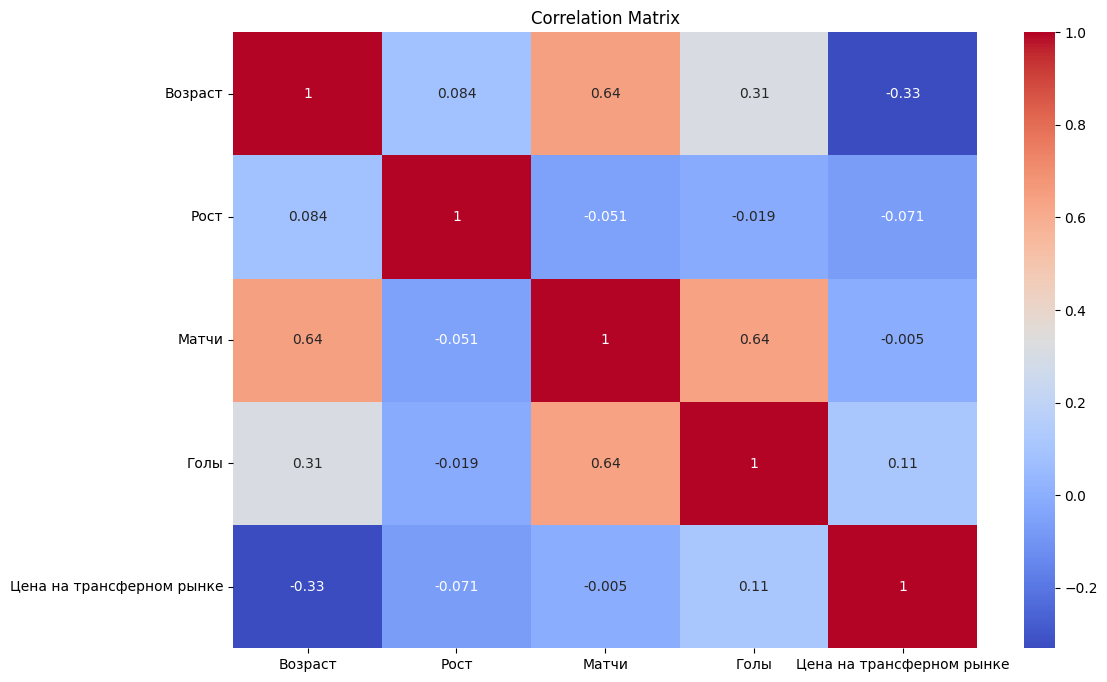

In [12]:
numeric_cols = df.select_dtypes(include=np.number).columns
plt.figure(figsize=(12, 8))
sns.heatmap(df[numeric_cols].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

(-0.5, 799.5, 399.5, -0.5)

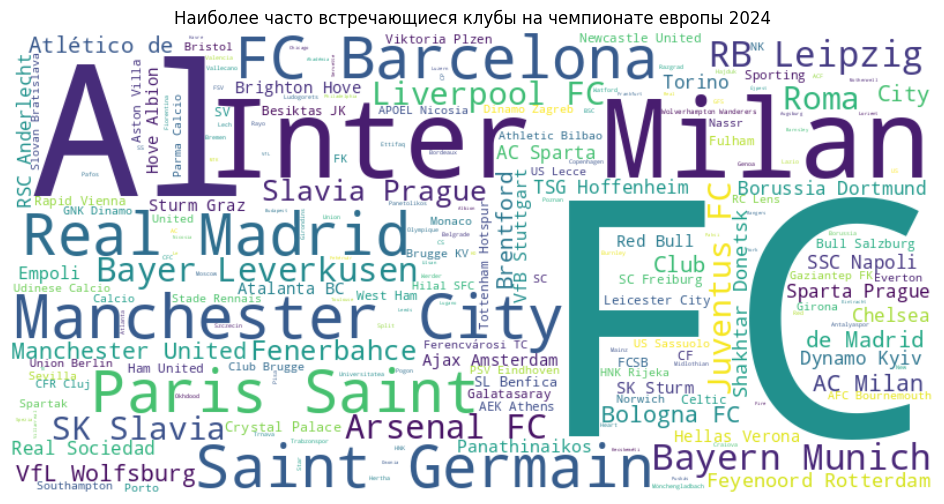

In [13]:
from wordcloud import WordCloud

reviews_text = ' '.join(df['Клуб'].dropna())
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(reviews_text)
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Наиболее часто встречающиеся клубы на чемпионате европы 2024')
plt.axis('off')

In [14]:
for col in df.columns:
    print(df[col].value_counts().nlargest(5))
    print('***')

Имя
Marc-André ter Stegen    1
Thomas Kaminski          1
Kylian Mbappé            1
Marcus Thuram            1
Randal Kolo Muani        1
Name: count, dtype: int64
***
Позиция
Centre-Back           125
Central Midfield       81
Centre-Forward         77
Goalkeeper             72
Defensive Midfield     50
Name: count, dtype: int64
***
Возраст
25    62
27    59
26    58
28    56
24    52
Name: count, dtype: int64
***
Клуб
Manchester City        13
Inter Milan            13
FC Barcelona           12
Real Madrid            12
Paris Saint-Germain    12
Name: count, dtype: int64
***
Рост
188    43
178    42
185    39
190    38
180    38
Name: count, dtype: int64
***
Рабочая нога
right    436
left     150
both      31
-          3
Name: count, dtype: int64
***
Матчи
1    37
3    27
2    22
6    17
4    16
Name: count, dtype: int64
***
Голы
0    253
1     94
2     70
3     44
4     23
Name: count, dtype: int64
***
Цена на трансферном рынке
5000000     28
3000000     26
2500000     26
30000000

In [15]:
df['Страна'] = df['Страна'].replace({
    'Turkiye': 'Turkey',
})

In [16]:
print(df.Позиция.unique())

['Goalkeeper' 'Centre-Back' 'Left-Back' 'Right-Back' 'Defensive Midfield'
 'Central Midfield' 'Attacking Midfield' 'Left Winger' 'Right Winger'
 'Second Striker' 'Centre-Forward' 'Right Midfield' 'Left Midfield']


In [17]:
df['Позиция'] = df['Позиция'].replace({
    'Centre-Back': 'Defender',
    'Left-Back': 'Defender',
    'Right-Back': 'Defender',
    'Defensive Midfield': 'Midfielder',
    'Central Midfield': 'Midfielder',
    'Attacking Midfield': 'Midfielder',
    'Left Winger': 'Striker',
    'Right Winger': 'Striker',
    'Second Striker': 'Striker',
    'Centre-Forward': 'Striker',
    'Right Midfield': 'Midfielder',
    'Left Midfield': 'Midfielder'
})

In [18]:
df['Позиция'].value_counts()

Позиция
Defender      201
Midfielder    189
Striker       161
Goalkeeper     72
Name: count, dtype: int64

In [19]:
df.describe()

,Возраст,Рост,Матчи,Голы,Цена на трансферном рынке
count,623.000000,623.000000,623.000000,623.000000,6.230000e+02
mean,27.040128,184.181380,30.338684,4.152488,1.840903e+07
std,4.124275,6.569258,30.987902,10.086803,2.426195e+07
min,16.000000,167.000000,0.000000,0.000000,5.000000e+04
25%,24.000000,180.000000,7.000000,0.000000,2.900000e+06
50%,27.000000,185.000000,21.000000,1.000000,9.000000e+06
75%,30.000000,189.000000,42.000000,4.000000,2.500000e+07
max,41.000000,202.000000,206.000000,128.000000,1.800000e+08


In [20]:
df.loc[df['Возраст'].idxmin()]

Имя                          Lamine Yamal
Позиция                           Striker
Возраст                                16
Клуб                         FC Barcelona
Рост                                  178
Рабочая нога                         left
Матчи                                   6
Голы                                    2
Цена на трансферном рынке        90000000
Страна                              Spain
Name: 126, dtype: object

In [21]:
df.loc[df['Возраст'].idxmax()]

Имя                              Pepe
Позиция                      Defender
Возраст                            41
Клуб                         FC Porto
Рост                              187
Рабочая нога                    right
Матчи                             136
Голы                                8
Цена на трансферном рынке      500000
Страна                       Portugal
Name: 577, dtype: object

In [22]:
df.loc[df['Матчи'].idxmax()]

Имя                          Cristiano Ronaldo
Позиция                                Striker
Возраст                                     39
Клуб                               Al-Nassr FC
Рост                                       188
Рабочая нога                             right
Матчи                                      206
Голы                                       128
Цена на трансферном рынке             15000000
Страна                                Portugal
Name: 596, dtype: object

In [23]:
def f(row):
  if row['Страна'] == 'Germany' or row['Страна'] == 'Scotland' or row['Страна'] == 'Hungary' or row['Страна'] == 'Switzerland':
    val = 'A'
  elif row['Страна'] == 'Spain' or row['Страна'] == 'Croatia' or row['Страна'] == 'Italy' or row['Страна'] == 'Albania':
    val = 'B'
  elif row['Страна'] == 'Slovenia' or row['Страна'] == 'Denmark' or row['Страна'] == 'Serbia' or row['Страна'] == 'England':
    val = 'C'
  elif row['Страна'] == 'Poland' or row['Страна'] == 'Netherlands' or row['Страна'] == 'Austria' or row['Страна'] == 'France':
    val = 'D'
  elif row['Страна'] == 'Belgium' or row['Страна'] == 'Slovakia' or row['Страна'] == 'Romania' or row['Страна'] == 'Ukraine':
    val = 'E'
  else :
    val = 'F'
  return val

df['Группа'] = df.apply(f, axis=1)
df.head(50)

,Имя,Позиция,Возраст,Клуб,Рост,Рабочая нога,Матчи,Голы,Цена на трансферном рынке,Страна,Группа
0,Marc-André ter Stegen,Goalkeeper,32,FC Barcelona,187,right,40,0,28000000,Germany,A
1,Manuel Neuer,Goalkeeper,38,Bayern Munich,193,right,119,0,4000000,Germany,A
2,Oliver Baumann,Goalkeeper,34,TSG 1899 Hoffenheim,187,right,0,0,3000000,Germany,A
3,Nico Schlotterbeck,Defender,24,Borussia Dortmund,191,left,12,0,40000000,Germany,A
4,Jonathan Tah,Defender,28,Bayer 04 Leverkusen,195,right,25,0,30000000,Germany,A
5,Antonio Rüdiger,Defender,31,Real Madrid,190,right,69,3,25000000,Germany,A
6,Waldemar Anton,Defender,27,VfB Stuttgart,189,right,2,0,20000000,Germany,A
7,Robin Koch,Defender,27,Eintracht Frankfurt,191,right,9,0,18000000,Germany,A
8,David Raum,Defender,26,RB Leipzig,180,left,21,0,20000000,Germany,A
9,Maximilian Mittelstädt,Defender,27,VfB Stuttgart,180,left,4,1,17000000,Germany,A


In [24]:
ave_cost = df.groupby('Группа')['Цена на трансферном рынке'].mean()
x = ave_cost // 1
print(x)

Группа
A    14469711.0
B    20291346.0
C    22901923.0
D    24297115.0
E    11770145.0
F    16660096.0
Name: Цена на трансферном рынке, dtype: float64


In [25]:
ave_cost1 = df.groupby('Страна')['Цена на трансферном рынке'].mean()
x1 = ave_cost1 // 1
print(x1)

Страна
Albania            4292307.0
Austria            9057692.0
Belgium           23380000.0
Croatia           12603846.0
Czech Republic     7457692.0
Denmark           15980769.0
England           58269230.0
France            49360000.0
Georgia            6159615.0
Germany           32730769.0
Hungary            6325000.0
Italy             27134615.0
Netherlands       32500000.0
Poland             7866666.0
Portugal          40557692.0
Romania            3543269.0
Scotland           7976923.0
Serbia            11992307.0
Slovakia           6026923.0
Slovenia           5365384.0
Spain             37134615.0
Switzerland       10846153.0
Turkey            12465384.0
Ukraine           14576923.0
Name: Цена на трансферном рынке, dtype: float64


In [26]:
def f(row):
  if row['Страна'] == 'Germany':
    pos = 'A1'
  elif row['Страна'] == 'Scotland':
    pos = 'A2'
  elif row['Страна'] == 'Hungary':
    pos = 'A3'
  elif row['Страна'] == 'Switzerland':
    pos = 'A4'
  elif row['Страна'] == 'Spain':
    pos = 'B1'
  elif row['Страна'] == 'Croatia':
    pos = 'B2'
  elif row['Страна'] == 'Italy':
    pos = 'B3'
  elif row['Страна'] == 'Albania':
    pos = 'B4'
  elif row['Страна'] == 'Slovenia':
    pos = 'C1'
  elif row['Страна'] == 'Denmark':
    pos = 'C2'
  elif row['Страна'] == 'Serbia':
    pos = 'C3'
  elif row['Страна'] == 'England':
    pos = 'C4'
  elif row['Страна'] == 'Poland':
    pos = 'D1'
  elif row['Страна'] == 'Netherlands':
    pos = 'D2'
  elif row['Страна'] == 'Austria':
    pos = 'D3'
  elif row['Страна'] == 'France':
    pos = 'D4'
  elif row['Страна'] == 'Belgium':
    pos = 'E1'
  elif row['Страна'] == 'Slovakia':
    pos = 'E2'
  elif row['Страна'] == 'Romania':
    pos = 'E3'
  elif row['Страна'] == 'Ukraine':
    pos = 'E4'
  elif row['Страна'] == 'Turkey':
    pos = 'F1'
  elif row['Страна'] == 'Georgia':
    pos = 'F2'
  elif row['Страна'] == 'Portugal':
    pos = 'F3'
  else :
    pos = 'F4'
  return pos

df['Позиция в группе'] = df.apply(f, axis=1)
df.head(10)

,Имя,Позиция,Возраст,Клуб,Рост,Рабочая нога,Матчи,Голы,Цена на трансферном рынке,Страна,Группа,Позиция в группе
0,Marc-André ter Stegen,Goalkeeper,32,FC Barcelona,187,right,40,0,28000000,Germany,A,A1
1,Manuel Neuer,Goalkeeper,38,Bayern Munich,193,right,119,0,4000000,Germany,A,A1
2,Oliver Baumann,Goalkeeper,34,TSG 1899 Hoffenheim,187,right,0,0,3000000,Germany,A,A1
3,Nico Schlotterbeck,Defender,24,Borussia Dortmund,191,left,12,0,40000000,Germany,A,A1
4,Jonathan Tah,Defender,28,Bayer 04 Leverkusen,195,right,25,0,30000000,Germany,A,A1
5,Antonio Rüdiger,Defender,31,Real Madrid,190,right,69,3,25000000,Germany,A,A1
6,Waldemar Anton,Defender,27,VfB Stuttgart,189,right,2,0,20000000,Germany,A,A1
7,Robin Koch,Defender,27,Eintracht Frankfurt,191,right,9,0,18000000,Germany,A,A1
8,David Raum,Defender,26,RB Leipzig,180,left,21,0,20000000,Germany,A,A1
9,Maximilian Mittelstädt,Defender,27,VfB Stuttgart,180,left,4,1,17000000,Germany,A,A1


In [115]:
my_list = list(range(1, 5))

In [132]:
groupe = df[['Страна', 'Группа','Позиция в группе']]
gr = groupe.drop_duplicates()
gr_A = gr.loc[gr['Группа'] == 'A']
gr_A.insert(len(gr_A.columns), 'Очки', value=pd.Series())
gr_A.insert(len(gr_A.columns), 'Голы забитые', value=pd.Series())
gr_A.insert(len(gr_A.columns), 'Голы пропущенные', value=pd.Series())
gr_A = gr_A.fillna(0)
gr_A.sort_values(by='Очки', ascending=False)
gr_A.head()

,Страна,Группа,Позиция в группе,Очки,Голы забитые,Голы пропущенные
0,Germany,A,A1,0,0,0
26,Scotland,A,A2,0,0,0
52,Hungary,A,A3,0,0,0
78,Switzerland,A,A4,0,0,0


In [71]:
groupe = df[['Страна', 'Группа','Позиция в группе']]
gr = groupe.drop_duplicates()
gr_B = gr.loc[gr['Группа'] == 'B']
gr_B.insert(len(gr_B.columns), 'Очки', value=pd.Series())
gr_B.insert(len(gr_B.columns), 'Голы забитые', value=pd.Series())
gr_B.insert(len(gr_B.columns), 'Голы пропущенные', value=pd.Series())
gr_B = gr_B.fillna(0)
gr_B.sort_values(by='Очки', ascending=False)
gr_B.head()

,Страна,Группа,Позиция в группе,Очки,Голы забитые,Голы пропущенные
104,Spain,B,B1,0,0,0
130,Croatia,B,B2,0,0,0
156,Albania,B,B4,0,0,0
182,Italy,B,B3,0,0,0


In [29]:
groupe = df[['Страна', 'Группа','Позиция в группе']]
gr = groupe.drop_duplicates()
gr_C = gr.loc[gr['Группа'] == 'C']
gr_C.insert(len(gr_C.columns), 'Очки', value=pd.Series())
gr_C.insert(len(gr_C.columns), 'Голы забитые', value=pd.Series())
gr_C.insert(len(gr_C.columns), 'Голы пропущенные', value=pd.Series())
gr_C = gr_C.fillna(0)
gr_C.sort_values(by='Очки', ascending=False)
gr_C.head()

,Страна,Группа,Позиция в группе,Очки,Голы забитые,Голы пропущенные
208,Slovenia,C,C1,0,0,0
234,England,C,C4,0,0,0
260,Denmark,C,C2,0,0,0
286,Serbia,C,C3,0,0,0


In [30]:
groupe = df[['Страна', 'Группа','Позиция в группе']]
gr = groupe.drop_duplicates()
gr_D = gr.loc[gr['Группа'] == 'D']
gr_D.insert(len(gr_D.columns), 'Очки', value=pd.Series())
gr_D.insert(len(gr_D.columns), 'Голы забитые', value=pd.Series())
gr_D.insert(len(gr_D.columns), 'Голы пропущенные', value=pd.Series())
gr_D = gr_D.fillna(0)
gr_D.sort_values(by='Очки', ascending=False)
gr_D.head()

,Страна,Группа,Позиция в группе,Очки,Голы забитые,Голы пропущенные
312,Poland,D,D1,0,0,0
339,Netherlands,D,D2,0,0,0
365,Austria,D,D3,0,0,0
391,France,D,D4,0,0,0


In [197]:
groupe = df[['Страна', 'Группа','Позиция в группе']]
gr = groupe.drop_duplicates()
gr_E = gr.loc[gr['Группа'] == 'E']
gr_E.insert(len(gr_E.columns), 'Очки', value=pd.Series())
gr_E.insert(len(gr_E.columns), 'Голы забитые', value=pd.Series())
gr_E.insert(len(gr_E.columns), 'Голы пропущенные', value=pd.Series())
gr_E = gr_E.fillna(0)
gr_E.sort_values(by='Очки', ascending=False)
gr_E.head()

,Страна,Группа,Позиция в группе,Очки,Голы забитые,Голы пропущенные
416,Belgium,E,E1,0,0,0
441,Slovakia,E,E2,0,0,0
467,Romania,E,E3,0,0,0
493,Ukraine,E,E4,0,0,0


In [215]:
groupe = df[['Страна', 'Группа','Позиция в группе']]
gr = groupe.drop_duplicates()
gr_F = gr.loc[gr['Группа'] == 'F']
gr_F.insert(len(gr_F.columns), 'Очки', value=pd.Series())
gr_F.insert(len(gr_F.columns), 'Голы забитые', value=pd.Series())
gr_F.insert(len(gr_F.columns), 'Голы пропущенные', value=pd.Series())
gr_F = gr_F.fillna(0)
gr_F.sort_values(by='Очки', ascending=False)
gr_F.head()

,Страна,Группа,Позиция в группе,Очки,Голы забитые,Голы пропущенные
519,Turkey,F,F1,0,0,0
545,Georgia,F,F2,0,0,0
571,Portugal,F,F3,0,0,0
597,Czech Republic,F,F4,0,0,0


In [33]:
import random

In [133]:
home_points = 0
away_points = 0
min_value = 0
max_value = 2

x1 = df.loc[df['Позиция в группе'] == 'A1','Матчи'].sum()
y1 = df.loc[df['Позиция в группе'] == 'A1','Имя'].count()

x2 = df.loc[df['Позиция в группе'] == 'A2','Матчи'].sum()
y2 = df.loc[df['Позиция в группе'] == 'A2','Имя'].count()

x3 = df.loc[df['Позиция в группе'] == 'A1','Цена на трансферном рынке'].sum()
x4 = df.loc[df['Позиция в группе'] == 'A2','Цена на трансферном рынке'].sum()

x5 = df.loc[df['Позиция в группе'] == 'A1','Возраст'].sum()
x6 = df.loc[df['Позиция в группе'] == 'A2','Возраст'].sum()

if x1 / y1 > x2 / y2:
  home_points = home_points + 1
else:
  away_points = away_points + 1

if x3 / y1 > x4 / y2:
  home_points = home_points + 1
else:
  away_points = away_points + 1

if 29 - x5 / y1 > 29 - x6 / y2:
  home_points = home_points + 1
else:
  away_points = away_points + 1

home_points_total = home_points + random.randint(min_value, max_value)
away_points_total = away_points + random.randint(min_value, max_value)

if home_points_total > away_points_total:
  gr_A.loc[df['Позиция в группе'] == 'A1','Очки'] += 3
elif home_points_total == away_points_total:
  gr_A.loc[df['Позиция в группе'] == 'A1','Очки'] += 1
  gr_A.loc[df['Позиция в группе'] == 'A2','Очки'] += 1
else:
  gr_A.loc[df['Позиция в группе'] == 'A2','Очки'] += 3

gr_A.loc[df['Позиция в группе'] == 'A1','Голы забитые'] += home_points_total
gr_A.loc[df['Позиция в группе'] == 'A1','Голы пропущенные'] += away_points_total

gr_A.loc[df['Позиция в группе'] == 'A2','Голы забитые'] += away_points_total
gr_A.loc[df['Позиция в группе'] == 'A2','Голы пропущенные'] += home_points_total

print(home_points_total, away_points_total)
gr_A.head()

3 0


,Страна,Группа,Позиция в группе,Очки,Голы забитые,Голы пропущенные
0,Germany,A,A1,3,3,0
26,Scotland,A,A2,0,0,3
52,Hungary,A,A3,0,0,0
78,Switzerland,A,A4,0,0,0


In [134]:
home_points = 0
away_points = 0
min_value = 0
max_value = 2

x1 = df.loc[df['Позиция в группе'] == 'A3','Матчи'].sum()
y1 = df.loc[df['Позиция в группе'] == 'A3','Имя'].count()

x2 = df.loc[df['Позиция в группе'] == 'A4','Матчи'].sum()
y2 = df.loc[df['Позиция в группе'] == 'A4','Имя'].count()

x3 = df.loc[df['Позиция в группе'] == 'A3','Цена на трансферном рынке'].sum()
x4 = df.loc[df['Позиция в группе'] == 'A4','Цена на трансферном рынке'].sum()

x5 = df.loc[df['Позиция в группе'] == 'A3','Возраст'].sum()
x6 = df.loc[df['Позиция в группе'] == 'A4','Возраст'].sum()

if x1 / y1 > x2 / y2:
  home_points = home_points + 1
else:
  away_points = away_points + 1

if x3 / y1 > x4 / y2:
  home_points = home_points + 1
else:
  away_points = away_points + 1

if 29 - x5 / y1 > 29 - x6 / y2:
  home_points = home_points + 1
else:
  away_points = away_points + 1

home_points_total = home_points + random.randint(min_value, max_value)
away_points_total = away_points + random.randint(min_value, max_value)

if home_points_total > away_points_total:
  gr_A.loc[df['Позиция в группе'] == 'A3','Очки'] += 3
elif home_points_total == away_points_total:
  gr_A.loc[df['Позиция в группе'] == 'A3','Очки'] += 1
  gr_A.loc[df['Позиция в группе'] == 'A4','Очки'] += 1
else:
  gr_A.loc[df['Позиция в группе'] == 'A4','Очки'] += 3

gr_A.loc[df['Позиция в группе'] == 'A3','Голы забитые'] += home_points_total
gr_A.loc[df['Позиция в группе'] == 'A3','Голы пропущенные'] += away_points_total

gr_A.loc[df['Позиция в группе'] == 'A4','Голы забитые'] += away_points_total
gr_A.loc[df['Позиция в группе'] == 'A4','Голы пропущенные'] += home_points_total

print(home_points_total, away_points_total)
gr_A.head()

1 2


,Страна,Группа,Позиция в группе,Очки,Голы забитые,Голы пропущенные
0,Germany,A,A1,3,3,0
26,Scotland,A,A2,0,0,3
52,Hungary,A,A3,0,1,2
78,Switzerland,A,A4,3,2,1


In [135]:
home_points = 0
away_points = 0
min_value = 0
max_value = 2

x1 = df.loc[df['Позиция в группе'] == 'A1','Матчи'].sum()
y1 = df.loc[df['Позиция в группе'] == 'A1','Имя'].count()

x2 = df.loc[df['Позиция в группе'] == 'A3','Матчи'].sum()
y2 = df.loc[df['Позиция в группе'] == 'A3','Имя'].count()

x3 = df.loc[df['Позиция в группе'] == 'A1','Цена на трансферном рынке'].sum()
x4 = df.loc[df['Позиция в группе'] == 'A3','Цена на трансферном рынке'].sum()

x5 = df.loc[df['Позиция в группе'] == 'A1','Возраст'].sum()
x6 = df.loc[df['Позиция в группе'] == 'A3','Возраст'].sum()

if x1 / y1 > x2 / y2:
  home_points = home_points + 1
else:
  away_points = away_points + 1

if x3 / y1 > x4 / y2:
  home_points = home_points + 1
else:
  away_points = away_points + 1

if 29 - x5 / y1 > 29 - x6 / y2:
  home_points = home_points + 1
else:
  away_points = away_points + 1

home_points_total = home_points + random.randint(min_value, max_value)
away_points_total = away_points + random.randint(min_value, max_value)

if home_points_total > away_points_total:
  gr_A.loc[df['Позиция в группе'] == 'A1','Очки'] += 3
elif home_points_total == away_points_total:
  gr_A.loc[df['Позиция в группе'] == 'A1','Очки'] += 1
  gr_A.loc[df['Позиция в группе'] == 'A3','Очки'] += 1
else:
  gr_A.loc[df['Позиция в группе'] == 'A3','Очки'] += 3

gr_A.loc[df['Позиция в группе'] == 'A1','Голы забитые'] += home_points_total
gr_A.loc[df['Позиция в группе'] == 'A1','Голы пропущенные'] += away_points_total

gr_A.loc[df['Позиция в группе'] == 'A3','Голы забитые'] += away_points_total
gr_A.loc[df['Позиция в группе'] == 'A3','Голы пропущенные'] += home_points_total

print(home_points_total, away_points_total)
gr_A.head()


2 2


,Страна,Группа,Позиция в группе,Очки,Голы забитые,Голы пропущенные
0,Germany,A,A1,4,5,2
26,Scotland,A,A2,0,0,3
52,Hungary,A,A3,1,3,4
78,Switzerland,A,A4,3,2,1


In [136]:
home_points = 0
away_points = 0
min_value = 0
max_value = 2

x1 = df.loc[df['Позиция в группе'] == 'A2','Матчи'].sum()
y1 = df.loc[df['Позиция в группе'] == 'A2','Имя'].count()

x2 = df.loc[df['Позиция в группе'] == 'A4','Матчи'].sum()
y2 = df.loc[df['Позиция в группе'] == 'A4','Имя'].count()

x3 = df.loc[df['Позиция в группе'] == 'A2','Цена на трансферном рынке'].sum()
x4 = df.loc[df['Позиция в группе'] == 'A4','Цена на трансферном рынке'].sum()

x5 = df.loc[df['Позиция в группе'] == 'A2','Возраст'].sum()
x6 = df.loc[df['Позиция в группе'] == 'A4','Возраст'].sum()

if x1 / y1 > x2 / y2:
  home_points = home_points + 1
else:
  away_points = away_points + 1

if x3 / y1 > x4 / y2:
  home_points = home_points + 1
else:
  away_points = away_points + 1

if 29 - x5 / y1 > 29 - x6 / y2:
  home_points = home_points + 1
else:
  away_points = away_points + 1

home_points_total = home_points + random.randint(min_value, max_value)
away_points_total = away_points + random.randint(min_value, max_value)

if home_points_total > away_points_total:
  gr_A.loc[df['Позиция в группе'] == 'A2','Очки'] += 3
elif home_points_total == away_points_total:
  gr_A.loc[df['Позиция в группе'] == 'A2','Очки'] += 1
  gr_A.loc[df['Позиция в группе'] == 'A4','Очки'] += 1
else:
  gr_A.loc[df['Позиция в группе'] == 'A4','Очки'] += 3

gr_A.loc[df['Позиция в группе'] == 'A2','Голы забитые'] += home_points_total
gr_A.loc[df['Позиция в группе'] == 'A2','Голы пропущенные'] += away_points_total

gr_A.loc[df['Позиция в группе'] == 'A4','Голы забитые'] += away_points_total
gr_A.loc[df['Позиция в группе'] == 'A4','Голы пропущенные'] += home_points_total

print(home_points_total, away_points_total)
gr_A.head()

0 3


,Страна,Группа,Позиция в группе,Очки,Голы забитые,Голы пропущенные
0,Germany,A,A1,4,5,2
26,Scotland,A,A2,0,0,6
52,Hungary,A,A3,1,3,4
78,Switzerland,A,A4,6,5,1


In [137]:
home_points = 0
away_points = 0
min_value = 0
max_value = 2

x1 = df.loc[df['Позиция в группе'] == 'A1','Матчи'].sum()
y1 = df.loc[df['Позиция в группе'] == 'A1','Имя'].count()

x2 = df.loc[df['Позиция в группе'] == 'A4','Матчи'].sum()
y2 = df.loc[df['Позиция в группе'] == 'A4','Имя'].count()

x3 = df.loc[df['Позиция в группе'] == 'A1','Цена на трансферном рынке'].sum()
x4 = df.loc[df['Позиция в группе'] == 'A4','Цена на трансферном рынке'].sum()

x5 = df.loc[df['Позиция в группе'] == 'A1','Возраст'].sum()
x6 = df.loc[df['Позиция в группе'] == 'A4','Возраст'].sum()

if x1 / y1 > x2 / y2:
  home_points = home_points + 1
else:
  away_points = away_points + 1

if x3 / y1 > x4 / y2:
  home_points = home_points + 1
else:
  away_points = away_points + 1

if 29 - x5 / y1 > 29 - x6 / y2:
  home_points = home_points + 1
else:
  away_points = away_points + 1

home_points_total = home_points + random.randint(min_value, max_value)
away_points_total = away_points + random.randint(min_value, max_value)

if home_points_total > away_points_total:
  gr_A.loc[df['Позиция в группе'] == 'A1','Очки'] += 3
elif home_points_total == away_points_total:
  gr_A.loc[df['Позиция в группе'] == 'A1','Очки'] += 1
  gr_A.loc[df['Позиция в группе'] == 'A4','Очки'] += 1
else:
  gr_A.loc[df['Позиция в группе'] == 'A4','Очки'] += 3

gr_A.loc[df['Позиция в группе'] == 'A1','Голы забитые'] += home_points_total
gr_A.loc[df['Позиция в группе'] == 'A1','Голы пропущенные'] += away_points_total

gr_A.loc[df['Позиция в группе'] == 'A4','Голы забитые'] += away_points_total
gr_A.loc[df['Позиция в группе'] == 'A4','Голы пропущенные'] += home_points_total

print(home_points_total, away_points_total)
gr_A.head()

3 3


,Страна,Группа,Позиция в группе,Очки,Голы забитые,Голы пропущенные
0,Germany,A,A1,5,8,5
26,Scotland,A,A2,0,0,6
52,Hungary,A,A3,1,3,4
78,Switzerland,A,A4,7,8,4


In [138]:
home_points = 0
away_points = 0
min_value = 0
max_value = 2

x1 = df.loc[df['Позиция в группе'] == 'A2','Матчи'].sum()
y1 = df.loc[df['Позиция в группе'] == 'A2','Имя'].count()

x2 = df.loc[df['Позиция в группе'] == 'A3','Матчи'].sum()
y2 = df.loc[df['Позиция в группе'] == 'A3','Имя'].count()

x3 = df.loc[df['Позиция в группе'] == 'A2','Цена на трансферном рынке'].sum()
x4 = df.loc[df['Позиция в группе'] == 'A3','Цена на трансферном рынке'].sum()

x5 = df.loc[df['Позиция в группе'] == 'A2','Возраст'].sum()
x6 = df.loc[df['Позиция в группе'] == 'A3','Возраст'].sum()

if x1 / y1 > x2 / y2:
  home_points = home_points + 1
else:
  away_points = away_points + 1

if x3 / y1 > x4 / y2:
  home_points = home_points + 1
else:
  away_points = away_points + 1

if 29 - x5 / y1 > 29 - x6 / y2:
  home_points = home_points + 1
else:
  away_points = away_points + 1

home_points_total = home_points + random.randint(min_value, max_value)
away_points_total = away_points + random.randint(min_value, max_value)

if home_points_total > away_points_total:
  gr_A.loc[df['Позиция в группе'] == 'A2','Очки'] += 3
elif home_points_total == away_points_total:
  gr_A.loc[df['Позиция в группе'] == 'A2','Очки'] += 1
  gr_A.loc[df['Позиция в группе'] == 'A3','Очки'] += 1
else:
  gr_A.loc[df['Позиция в группе'] == 'A3','Очки'] += 3

gr_A.loc[df['Позиция в группе'] == 'A2','Голы забитые'] += home_points_total
gr_A.loc[df['Позиция в группе'] == 'A2','Голы пропущенные'] += away_points_total

gr_A.loc[df['Позиция в группе'] == 'A3','Голы забитые'] += away_points_total
gr_A.loc[df['Позиция в группе'] == 'A3','Голы пропущенные'] += home_points_total

print(home_points_total, away_points_total)
gr_A.head()

3 4


,Страна,Группа,Позиция в группе,Очки,Голы забитые,Голы пропущенные
0,Germany,A,A1,5,8,5
26,Scotland,A,A2,0,3,10
52,Hungary,A,A3,4,7,7
78,Switzerland,A,A4,7,8,4


In [228]:
gr_A['Разница мячей'] = gr_A['Голы забитые'] - gr_A['Голы пропущенные']
gr_A['Место'] = gr_A['Очки'].rank(pct = False,ascending= False)
gr_A.sort_values(by='Очки', ascending=False)

,Страна,Группа,Позиция в группе,Очки,Голы забитые,Голы пропущенные,Место,Разница мячей
78,Switzerland,A,A4,7,8,4,1.0,4
0,Germany,A,A1,5,8,5,2.0,3
52,Hungary,A,A3,4,7,7,3.0,0
26,Scotland,A,A2,0,3,10,4.0,-7


In [75]:
home_points = 0
away_points = 0
min_value = 0
max_value = 2

x1 = df.loc[df['Позиция в группе'] == 'B1','Матчи'].sum()
y1 = df.loc[df['Позиция в группе'] == 'B1','Имя'].count()

x2 = df.loc[df['Позиция в группе'] == 'B2','Матчи'].sum()
y2 = df.loc[df['Позиция в группе'] == 'B2','Имя'].count()

x3 = df.loc[df['Позиция в группе'] == 'B1','Цена на трансферном рынке'].sum()
x4 = df.loc[df['Позиция в группе'] == 'B2','Цена на трансферном рынке'].sum()

x5 = df.loc[df['Позиция в группе'] == 'B1','Возраст'].sum()
x6 = df.loc[df['Позиция в группе'] == 'B2','Возраст'].sum()

if x1 / y1 > x2 / y2:
  home_points = home_points + 1
else:
  away_points = away_points + 1

if x3 / y1 > x4 / y2:
  home_points = home_points + 1
else:
  away_points = away_points + 1

if 29 - x5 / y1 > 29 - x6 / y2:
  home_points = home_points + 1
else:
  away_points = away_points + 1

home_points_total = home_points + random.randint(min_value, max_value)
away_points_total = away_points + random.randint(min_value, max_value)

if home_points_total > away_points_total:
  gr_B.loc[df['Позиция в группе'] == 'B1','Очки'] += 3
elif home_points_total == away_points_total:
  gr_B.loc[df['Позиция в группе'] == 'B1','Очки'] += 1
  gr_B.loc[df['Позиция в группе'] == 'B2','Очки'] += 1
else:
  gr_B.loc[df['Позиция в группе'] == 'B2','Очки'] += 3

gr_B.loc[df['Позиция в группе'] == 'B1','Голы забитые'] += home_points_total
gr_B.loc[df['Позиция в группе'] == 'B1','Голы пропущенные'] += away_points_total

gr_B.loc[df['Позиция в группе'] == 'B2','Голы забитые'] += away_points_total
gr_B.loc[df['Позиция в группе'] == 'B2','Голы пропущенные'] += home_points_total

print(home_points_total, away_points_total)
gr_B.head()

3 3


,Страна,Группа,Позиция в группе,Очки,Голы забитые,Голы пропущенные
104,Spain,B,B1,1,3,3
130,Croatia,B,B2,1,3,3
156,Albania,B,B4,0,0,0
182,Italy,B,B3,0,0,0


In [76]:
home_points = 0
away_points = 0
min_value = 0
max_value = 2

x1 = df.loc[df['Позиция в группе'] == 'B3','Матчи'].sum()
y1 = df.loc[df['Позиция в группе'] == 'B3','Имя'].count()

x2 = df.loc[df['Позиция в группе'] == 'B4','Матчи'].sum()
y2 = df.loc[df['Позиция в группе'] == 'B4','Имя'].count()

x3 = df.loc[df['Позиция в группе'] == 'B3','Цена на трансферном рынке'].sum()
x4 = df.loc[df['Позиция в группе'] == 'B4','Цена на трансферном рынке'].sum()

x5 = df.loc[df['Позиция в группе'] == 'B3','Возраст'].sum()
x6 = df.loc[df['Позиция в группе'] == 'B4','Возраст'].sum()

if x1 / y1 > x2 / y2:
  home_points = home_points + 1
else:
  away_points = away_points + 1

if x3 / y1 > x4 / y2:
  home_points = home_points + 1
else:
  away_points = away_points + 1

if 29 - x5 / y1 > 29 - x6 / y2:
  home_points = home_points + 1
else:
  away_points = away_points + 1

home_points_total = home_points + random.randint(min_value, max_value)
away_points_total = away_points + random.randint(min_value, max_value)

if home_points_total > away_points_total:
  gr_B.loc[df['Позиция в группе'] == 'B3','Очки'] += 3
elif home_points_total == away_points_total:
  gr_B.loc[df['Позиция в группе'] == 'B3','Очки'] += 1
  gr_B.loc[df['Позиция в группе'] == 'B4','Очки'] += 1
else:
  gr_B.loc[df['Позиция в группе'] == 'B4','Очки'] += 3

gr_B.loc[df['Позиция в группе'] == 'B3','Голы забитые'] += home_points_total
gr_B.loc[df['Позиция в группе'] == 'B3','Голы пропущенные'] += away_points_total

gr_B.loc[df['Позиция в группе'] == 'B4','Голы забитые'] += away_points_total
gr_B.loc[df['Позиция в группе'] == 'B4','Голы пропущенные'] += home_points_total

print(home_points_total, away_points_total)
gr_B.head()

4 2


,Страна,Группа,Позиция в группе,Очки,Голы забитые,Голы пропущенные
104,Spain,B,B1,1,3,3
130,Croatia,B,B2,1,3,3
156,Albania,B,B4,0,2,4
182,Italy,B,B3,3,4,2


In [78]:
home_points = 0
away_points = 0
min_value = 0
max_value = 2

x1 = df.loc[df['Позиция в группе'] == 'B1','Матчи'].sum()
y1 = df.loc[df['Позиция в группе'] == 'B1','Имя'].count()

x2 = df.loc[df['Позиция в группе'] == 'B3','Матчи'].sum()
y2 = df.loc[df['Позиция в группе'] == 'B3','Имя'].count()

x3 = df.loc[df['Позиция в группе'] == 'B1','Цена на трансферном рынке'].sum()
x4 = df.loc[df['Позиция в группе'] == 'B3','Цена на трансферном рынке'].sum()

x5 = df.loc[df['Позиция в группе'] == 'B1','Возраст'].sum()
x6 = df.loc[df['Позиция в группе'] == 'B3','Возраст'].sum()

if x1 / y1 > x2 / y2:
  home_points = home_points + 1
else:
  away_points = away_points + 1

if x3 / y1 > x4 / y2:
  home_points = home_points + 1
else:
  away_points = away_points + 1

if 29 - x5 / y1 > 29 - x6 / y2:
  home_points = home_points + 1
else:
  away_points = away_points + 1

home_points_total = home_points + random.randint(min_value, max_value)
away_points_total = away_points + random.randint(min_value, max_value)

if home_points_total > away_points_total:
  gr_B.loc[df['Позиция в группе'] == 'B1','Очки'] += 3
elif home_points_total == away_points_total:
  gr_B.loc[df['Позиция в группе'] == 'B1','Очки'] += 1
  gr_B.loc[df['Позиция в группе'] == 'B3','Очки'] += 1
else:
  gr_B.loc[df['Позиция в группе'] == 'B3','Очки'] += 3

gr_B.loc[df['Позиция в группе'] == 'B1','Голы забитые'] += home_points_total
gr_B.loc[df['Позиция в группе'] == 'B1','Голы пропущенные'] += away_points_total

gr_B.loc[df['Позиция в группе'] == 'B3','Голы забитые'] += away_points_total
gr_B.loc[df['Позиция в группе'] == 'B3','Голы пропущенные'] += home_points_total

print(home_points_total, away_points_total)
gr_B.head()


2 1


,Страна,Группа,Позиция в группе,Очки,Голы забитые,Голы пропущенные
104,Spain,B,B1,4,5,4
130,Croatia,B,B2,1,3,3
156,Albania,B,B4,0,2,4
182,Italy,B,B3,3,5,4


In [79]:
home_points = 0
away_points = 0
min_value = 0
max_value = 2

x1 = df.loc[df['Позиция в группе'] == 'B2','Матчи'].sum()
y1 = df.loc[df['Позиция в группе'] == 'B2','Имя'].count()

x2 = df.loc[df['Позиция в группе'] == 'B4','Матчи'].sum()
y2 = df.loc[df['Позиция в группе'] == 'B4','Имя'].count()

x3 = df.loc[df['Позиция в группе'] == 'B2','Цена на трансферном рынке'].sum()
x4 = df.loc[df['Позиция в группе'] == 'B4','Цена на трансферном рынке'].sum()

x5 = df.loc[df['Позиция в группе'] == 'B2','Возраст'].sum()
x6 = df.loc[df['Позиция в группе'] == 'B4','Возраст'].sum()

if x1 / y1 > x2 / y2:
  home_points = home_points + 1
else:
  away_points = away_points + 1

if x3 / y1 > x4 / y2:
  home_points = home_points + 1
else:
  away_points = away_points + 1

if 29 - x5 / y1 > 29 - x6 / y2:
  home_points = home_points + 1
else:
  away_points = away_points + 1

home_points_total = home_points + random.randint(min_value, max_value)
away_points_total = away_points + random.randint(min_value, max_value)

if home_points_total > away_points_total:
  gr_B.loc[df['Позиция в группе'] == 'B2','Очки'] += 3
elif home_points_total == away_points_total:
  gr_B.loc[df['Позиция в группе'] == 'B2','Очки'] += 1
  gr_B.loc[df['Позиция в группе'] == 'B4','Очки'] += 1
else:
  gr_B.loc[df['Позиция в группе'] == 'B4','Очки'] += 3

gr_B.loc[df['Позиция в группе'] == 'B2','Голы забитые'] += home_points_total
gr_B.loc[df['Позиция в группе'] == 'B2','Голы пропущенные'] += away_points_total

gr_B.loc[df['Позиция в группе'] == 'B4','Голы забитые'] += away_points_total
gr_B.loc[df['Позиция в группе'] == 'B4','Голы пропущенные'] += home_points_total

print(home_points_total, away_points_total)
gr_B.head()

3 1


,Страна,Группа,Позиция в группе,Очки,Голы забитые,Голы пропущенные
104,Spain,B,B1,4,5,4
130,Croatia,B,B2,4,6,4
156,Albania,B,B4,0,3,7
182,Italy,B,B3,3,5,4


In [80]:
home_points = 0
away_points = 0
min_value = 0
max_value = 2

x1 = df.loc[df['Позиция в группе'] == 'B1','Матчи'].sum()
y1 = df.loc[df['Позиция в группе'] == 'B1','Имя'].count()

x2 = df.loc[df['Позиция в группе'] == 'B4','Матчи'].sum()
y2 = df.loc[df['Позиция в группе'] == 'B4','Имя'].count()

x3 = df.loc[df['Позиция в группе'] == 'B1','Цена на трансферном рынке'].sum()
x4 = df.loc[df['Позиция в группе'] == 'B4','Цена на трансферном рынке'].sum()

x5 = df.loc[df['Позиция в группе'] == 'B1','Возраст'].sum()
x6 = df.loc[df['Позиция в группе'] == 'B4','Возраст'].sum()

if x1 / y1 > x2 / y2:
  home_points = home_points + 1
else:
  away_points = away_points + 1

if x3 / y1 > x4 / y2:
  home_points = home_points + 1
else:
  away_points = away_points + 1

if 29 - x5 / y1 > 29 - x6 / y2:
  home_points = home_points + 1
else:
  away_points = away_points + 1

home_points_total = home_points + random.randint(min_value, max_value)
away_points_total = away_points + random.randint(min_value, max_value)

if home_points_total > away_points_total:
  gr_B.loc[df['Позиция в группе'] == 'B1','Очки'] += 3
elif home_points_total == away_points_total:
  gr_B.loc[df['Позиция в группе'] == 'B1','Очки'] += 1
  gr_B.loc[df['Позиция в группе'] == 'B4','Очки'] += 1
else:
  gr_B.loc[df['Позиция в группе'] == 'B4','Очки'] += 3

gr_B.loc[df['Позиция в группе'] == 'B1','Голы забитые'] += home_points_total
gr_B.loc[df['Позиция в группе'] == 'B1','Голы пропущенные'] += away_points_total

gr_B.loc[df['Позиция в группе'] == 'B4','Голы забитые'] += away_points_total
gr_B.loc[df['Позиция в группе'] == 'B4','Голы пропущенные'] += home_points_total

print(home_points_total, away_points_total)
gr_B.head()

4 2


,Страна,Группа,Позиция в группе,Очки,Голы забитые,Голы пропущенные
104,Spain,B,B1,7,9,6
130,Croatia,B,B2,4,6,4
156,Albania,B,B4,0,5,11
182,Italy,B,B3,3,5,4


In [81]:
home_points = 0
away_points = 0
min_value = 0
max_value = 2

x1 = df.loc[df['Позиция в группе'] == 'B2','Матчи'].sum()
y1 = df.loc[df['Позиция в группе'] == 'B2','Имя'].count()

x2 = df.loc[df['Позиция в группе'] == 'B3','Матчи'].sum()
y2 = df.loc[df['Позиция в группе'] == 'B3','Имя'].count()

x3 = df.loc[df['Позиция в группе'] == 'B2','Цена на трансферном рынке'].sum()
x4 = df.loc[df['Позиция в группе'] == 'B3','Цена на трансферном рынке'].sum()

x5 = df.loc[df['Позиция в группе'] == 'B2','Возраст'].sum()
x6 = df.loc[df['Позиция в группе'] == 'B3','Возраст'].sum()

if x1 / y1 > x2 / y2:
  home_points = home_points + 1
else:
  away_points = away_points + 1

if x3 / y1 > x4 / y2:
  home_points = home_points + 1
else:
  away_points = away_points + 1

if 29 - x5 / y1 > 29 - x6 / y2:
  home_points = home_points + 1
else:
  away_points = away_points + 1

home_points_total = home_points + random.randint(min_value, max_value)
away_points_total = away_points + random.randint(min_value, max_value)

if home_points_total > away_points_total:
  gr_B.loc[df['Позиция в группе'] == 'B2','Очки'] += 3
elif home_points_total == away_points_total:
  gr_B.loc[df['Позиция в группе'] == 'B2','Очки'] += 1
  gr_B.loc[df['Позиция в группе'] == 'B3','Очки'] += 1
else:
  gr_B.loc[df['Позиция в группе'] == 'B3','Очки'] += 3

gr_B.loc[df['Позиция в группе'] == 'B2','Голы забитые'] += home_points_total
gr_B.loc[df['Позиция в группе'] == 'B2','Голы пропущенные'] += away_points_total

gr_B.loc[df['Позиция в группе'] == 'B3','Голы забитые'] += away_points_total
gr_B.loc[df['Позиция в группе'] == 'B3','Голы пропущенные'] += home_points_total

print(home_points_total, away_points_total)
gr_B.head()

2 4


,Страна,Группа,Позиция в группе,Очки,Голы забитые,Голы пропущенные
104,Spain,B,B1,7,9,6
130,Croatia,B,B2,4,8,8
156,Albania,B,B4,0,5,11
182,Italy,B,B3,6,9,6


In [229]:
gr_B['Разница мячей'] = gr_B['Голы забитые'] - gr_B['Голы пропущенные']
gr_B['Место'] = gr_B['Очки'].rank(pct = False,ascending= False)
gr_B.sort_values(by='Очки', ascending=False)

,Страна,Группа,Позиция в группе,Очки,Голы забитые,Голы пропущенные,Место,Разница мячей
104,Spain,B,B1,7,9,6,1.0,3
182,Italy,B,B3,6,9,6,2.0,3
130,Croatia,B,B2,4,8,8,3.0,0
156,Albania,B,B4,0,5,11,4.0,-6


In [83]:
home_points = 0
away_points = 0
min_value = 0
max_value = 2

x1 = df.loc[df['Позиция в группе'] == 'C1','Матчи'].sum()
y1 = df.loc[df['Позиция в группе'] == 'C1','Имя'].count()

x2 = df.loc[df['Позиция в группе'] == 'C2','Матчи'].sum()
y2 = df.loc[df['Позиция в группе'] == 'C2','Имя'].count()

x3 = df.loc[df['Позиция в группе'] == 'C1','Цена на трансферном рынке'].sum()
x4 = df.loc[df['Позиция в группе'] == 'C2','Цена на трансферном рынке'].sum()

x5 = df.loc[df['Позиция в группе'] == 'C1','Возраст'].sum()
x6 = df.loc[df['Позиция в группе'] == 'C2','Возраст'].sum()

if x1 / y1 > x2 / y2:
  home_points = home_points + 1
else:
  away_points = away_points + 1

if x3 / y1 > x4 / y2:
  home_points = home_points + 1
else:
  away_points = away_points + 1

if 29 - x5 / y1 > 29 - x6 / y2:
  home_points = home_points + 1
else:
  away_points = away_points + 1

home_points_total = home_points + random.randint(min_value, max_value)
away_points_total = away_points + random.randint(min_value, max_value)

if home_points_total > away_points_total:
  gr_C.loc[df['Позиция в группе'] == 'C1','Очки'] += 3
elif home_points_total == away_points_total:
  gr_C.loc[df['Позиция в группе'] == 'C1','Очки'] += 1
  gr_C.loc[df['Позиция в группе'] == 'C2','Очки'] += 1
else:
  gr_C.loc[df['Позиция в группе'] == 'C2','Очки'] += 3

gr_C.loc[df['Позиция в группе'] == 'C1','Голы забитые'] += home_points_total
gr_C.loc[df['Позиция в группе'] == 'C1','Голы пропущенные'] += away_points_total

gr_C.loc[df['Позиция в группе'] == 'C2','Голы забитые'] += away_points_total
gr_C.loc[df['Позиция в группе'] == 'C2','Голы пропущенные'] += home_points_total

print(home_points_total, away_points_total)
gr_C.head()

2 3


,Страна,Группа,Позиция в группе,Очки,Голы забитые,Голы пропущенные
208,Slovenia,C,C1,0,2,3
234,England,C,C4,0,0,0
260,Denmark,C,C2,3,3,2
286,Serbia,C,C3,0,0,0


In [84]:
home_points = 0
away_points = 0
min_value = 0
max_value = 2

x1 = df.loc[df['Позиция в группе'] == 'C3','Матчи'].sum()
y1 = df.loc[df['Позиция в группе'] == 'C3','Имя'].count()

x2 = df.loc[df['Позиция в группе'] == 'C4','Матчи'].sum()
y2 = df.loc[df['Позиция в группе'] == 'C4','Имя'].count()

x3 = df.loc[df['Позиция в группе'] == 'C3','Цена на трансферном рынке'].sum()
x4 = df.loc[df['Позиция в группе'] == 'C4','Цена на трансферном рынке'].sum()

x5 = df.loc[df['Позиция в группе'] == 'C3','Возраст'].sum()
x6 = df.loc[df['Позиция в группе'] == 'C4','Возраст'].sum()

if x1 / y1 > x2 / y2:
  home_points = home_points + 1
else:
  away_points = away_points + 1

if x3 / y1 > x4 / y2:
  home_points = home_points + 1
else:
  away_points = away_points + 1

if 29 - x5 / y1 > 29 - x6 / y2:
  home_points = home_points + 1
else:
  away_points = away_points + 1

home_points_total = home_points + random.randint(min_value, max_value)
away_points_total = away_points + random.randint(min_value, max_value)

if home_points_total > away_points_total:
  gr_C.loc[df['Позиция в группе'] == 'C3','Очки'] += 3
elif home_points_total == away_points_total:
  gr_C.loc[df['Позиция в группе'] == 'C3','Очки'] += 1
  gr_C.loc[df['Позиция в группе'] == 'C4','Очки'] += 1
else:
  gr_C.loc[df['Позиция в группе'] == 'C4','Очки'] += 3

gr_C.loc[df['Позиция в группе'] == 'C3','Голы забитые'] += home_points_total
gr_C.loc[df['Позиция в группе'] == 'C3','Голы пропущенные'] += away_points_total

gr_C.loc[df['Позиция в группе'] == 'C4','Голы забитые'] += away_points_total
gr_C.loc[df['Позиция в группе'] == 'C4','Голы пропущенные'] += home_points_total

print(home_points_total, away_points_total)
gr_C.head()

2 3


,Страна,Группа,Позиция в группе,Очки,Голы забитые,Голы пропущенные
208,Slovenia,C,C1,0,2,3
234,England,C,C4,3,3,2
260,Denmark,C,C2,3,3,2
286,Serbia,C,C3,0,2,3


In [85]:
home_points = 0
away_points = 0
min_value = 0
max_value = 2

x1 = df.loc[df['Позиция в группе'] == 'C1','Матчи'].sum()
y1 = df.loc[df['Позиция в группе'] == 'C1','Имя'].count()

x2 = df.loc[df['Позиция в группе'] == 'C3','Матчи'].sum()
y2 = df.loc[df['Позиция в группе'] == 'C3','Имя'].count()

x3 = df.loc[df['Позиция в группе'] == 'C1','Цена на трансферном рынке'].sum()
x4 = df.loc[df['Позиция в группе'] == 'C3','Цена на трансферном рынке'].sum()

x5 = df.loc[df['Позиция в группе'] == 'C1','Возраст'].sum()
x6 = df.loc[df['Позиция в группе'] == 'C3','Возраст'].sum()

if x1 / y1 > x2 / y2:
  home_points = home_points + 1
else:
  away_points = away_points + 1

if x3 / y1 > x4 / y2:
  home_points = home_points + 1
else:
  away_points = away_points + 1

if 29 - x5 / y1 > 29 - x6 / y2:
  home_points = home_points + 1
else:
  away_points = away_points + 1

home_points_total = home_points + random.randint(min_value, max_value)
away_points_total = away_points + random.randint(min_value, max_value)

if home_points_total > away_points_total:
  gr_C.loc[df['Позиция в группе'] == 'C1','Очки'] += 3
elif home_points_total == away_points_total:
  gr_C.loc[df['Позиция в группе'] == 'C1','Очки'] += 1
  gr_C.loc[df['Позиция в группе'] == 'C3','Очки'] += 1
else:
  gr_C.loc[df['Позиция в группе'] == 'C3','Очки'] += 3

gr_C.loc[df['Позиция в группе'] == 'C1','Голы забитые'] += home_points_total
gr_C.loc[df['Позиция в группе'] == 'C1','Голы пропущенные'] += away_points_total

gr_C.loc[df['Позиция в группе'] == 'C3','Голы забитые'] += away_points_total
gr_C.loc[df['Позиция в группе'] == 'C3','Голы пропущенные'] += home_points_total

print(home_points_total, away_points_total)
gr_C.head()


1 2


,Страна,Группа,Позиция в группе,Очки,Голы забитые,Голы пропущенные
208,Slovenia,C,C1,0,3,5
234,England,C,C4,3,3,2
260,Denmark,C,C2,3,3,2
286,Serbia,C,C3,3,4,4


In [86]:
home_points = 0
away_points = 0
min_value = 0
max_value = 2

x1 = df.loc[df['Позиция в группе'] == 'C2','Матчи'].sum()
y1 = df.loc[df['Позиция в группе'] == 'C2','Имя'].count()

x2 = df.loc[df['Позиция в группе'] == 'C4','Матчи'].sum()
y2 = df.loc[df['Позиция в группе'] == 'C4','Имя'].count()

x3 = df.loc[df['Позиция в группе'] == 'C2','Цена на трансферном рынке'].sum()
x4 = df.loc[df['Позиция в группе'] == 'C4','Цена на трансферном рынке'].sum()

x5 = df.loc[df['Позиция в группе'] == 'C2','Возраст'].sum()
x6 = df.loc[df['Позиция в группе'] == 'C4','Возраст'].sum()

if x1 / y1 > x2 / y2:
  home_points = home_points + 1
else:
  away_points = away_points + 1

if x3 / y1 > x4 / y2:
  home_points = home_points + 1
else:
  away_points = away_points + 1

if 29 - x5 / y1 > 29 - x6 / y2:
  home_points = home_points + 1
else:
  away_points = away_points + 1

home_points_total = home_points + random.randint(min_value, max_value)
away_points_total = away_points + random.randint(min_value, max_value)

if home_points_total > away_points_total:
  gr_C.loc[df['Позиция в группе'] == 'C2','Очки'] += 3
elif home_points_total == away_points_total:
  gr_C.loc[df['Позиция в группе'] == 'C2','Очки'] += 1
  gr_C.loc[df['Позиция в группе'] == 'C4','Очки'] += 1
else:
  gr_C.loc[df['Позиция в группе'] == 'C4','Очки'] += 3

gr_C.loc[df['Позиция в группе'] == 'C2','Голы забитые'] += home_points_total
gr_C.loc[df['Позиция в группе'] == 'C2','Голы пропущенные'] += away_points_total

gr_C.loc[df['Позиция в группе'] == 'C4','Голы забитые'] += away_points_total
gr_C.loc[df['Позиция в группе'] == 'C4','Голы пропущенные'] += home_points_total

print(home_points_total, away_points_total)
gr_C.head()

1 4


,Страна,Группа,Позиция в группе,Очки,Голы забитые,Голы пропущенные
208,Slovenia,C,C1,0,3,5
234,England,C,C4,6,7,3
260,Denmark,C,C2,3,4,6
286,Serbia,C,C3,3,4,4


In [87]:
home_points = 0
away_points = 0
min_value = 0
max_value = 2

x1 = df.loc[df['Позиция в группе'] == 'C1','Матчи'].sum()
y1 = df.loc[df['Позиция в группе'] == 'C1','Имя'].count()

x2 = df.loc[df['Позиция в группе'] == 'C4','Матчи'].sum()
y2 = df.loc[df['Позиция в группе'] == 'C4','Имя'].count()

x3 = df.loc[df['Позиция в группе'] == 'C1','Цена на трансферном рынке'].sum()
x4 = df.loc[df['Позиция в группе'] == 'C4','Цена на трансферном рынке'].sum()

x5 = df.loc[df['Позиция в группе'] == 'C1','Возраст'].sum()
x6 = df.loc[df['Позиция в группе'] == 'C4','Возраст'].sum()

if x1 / y1 > x2 / y2:
  home_points = home_points + 1
else:
  away_points = away_points + 1

if x3 / y1 > x4 / y2:
  home_points = home_points + 1
else:
  away_points = away_points + 1

if 29 - x5 / y1 > 29 - x6 / y2:
  home_points = home_points + 1
else:
  away_points = away_points + 1

home_points_total = home_points + random.randint(min_value, max_value)
away_points_total = away_points + random.randint(min_value, max_value)

if home_points_total > away_points_total:
  gr_C.loc[df['Позиция в группе'] == 'C1','Очки'] += 3
elif home_points_total == away_points_total:
  gr_C.loc[df['Позиция в группе'] == 'C1','Очки'] += 1
  gr_C.loc[df['Позиция в группе'] == 'C4','Очки'] += 1
else:
  gr_C.loc[df['Позиция в группе'] == 'C4','Очки'] += 3

gr_C.loc[df['Позиция в группе'] == 'C1','Голы забитые'] += home_points_total
gr_C.loc[df['Позиция в группе'] == 'C1','Голы пропущенные'] += away_points_total

gr_C.loc[df['Позиция в группе'] == 'C4','Голы забитые'] += away_points_total
gr_C.loc[df['Позиция в группе'] == 'C4','Голы пропущенные'] += home_points_total

print(home_points_total, away_points_total)
gr_C.head()

2 4


,Страна,Группа,Позиция в группе,Очки,Голы забитые,Голы пропущенные
208,Slovenia,C,C1,0,5,9
234,England,C,C4,9,11,5
260,Denmark,C,C2,3,4,6
286,Serbia,C,C3,3,4,4


In [88]:
home_points = 0
away_points = 0
min_value = 0
max_value = 2

x1 = df.loc[df['Позиция в группе'] == 'C2','Матчи'].sum()
y1 = df.loc[df['Позиция в группе'] == 'C2','Имя'].count()

x2 = df.loc[df['Позиция в группе'] == 'C3','Матчи'].sum()
y2 = df.loc[df['Позиция в группе'] == 'C3','Имя'].count()

x3 = df.loc[df['Позиция в группе'] == 'C2','Цена на трансферном рынке'].sum()
x4 = df.loc[df['Позиция в группе'] == 'C3','Цена на трансферном рынке'].sum()

x5 = df.loc[df['Позиция в группе'] == 'C2','Возраст'].sum()
x6 = df.loc[df['Позиция в группе'] == 'C3','Возраст'].sum()

if x1 / y1 > x2 / y2:
  home_points = home_points + 1
else:
  away_points = away_points + 1

if x3 / y1 > x4 / y2:
  home_points = home_points + 1
else:
  away_points = away_points + 1

if 29 - x5 / y1 > 29 - x6 / y2:
  home_points = home_points + 1
else:
  away_points = away_points + 1

home_points_total = home_points + random.randint(min_value, max_value)
away_points_total = away_points + random.randint(min_value, max_value)

if home_points_total > away_points_total:
  gr_C.loc[df['Позиция в группе'] == 'C2','Очки'] += 3
elif home_points_total == away_points_total:
  gr_C.loc[df['Позиция в группе'] == 'C2','Очки'] += 1
  gr_C.loc[df['Позиция в группе'] == 'C3','Очки'] += 1
else:
  gr_C.loc[df['Позиция в группе'] == 'C3','Очки'] += 3

gr_C.loc[df['Позиция в группе'] == 'C2','Голы забитые'] += home_points_total
gr_C.loc[df['Позиция в группе'] == 'C2','Голы пропущенные'] += away_points_total

gr_C.loc[df['Позиция в группе'] == 'C3','Голы забитые'] += away_points_total
gr_C.loc[df['Позиция в группе'] == 'C3','Голы пропущенные'] += home_points_total

print(home_points_total, away_points_total)
gr_C.head()

4 1


,Страна,Группа,Позиция в группе,Очки,Голы забитые,Голы пропущенные
208,Slovenia,C,C1,0,5,9
234,England,C,C4,9,11,5
260,Denmark,C,C2,6,8,7
286,Serbia,C,C3,3,4,4


In [230]:
gr_C['Разница мячей'] = gr_C['Голы забитые'] - gr_C['Голы пропущенные']
gr_C['Место'] = gr_C['Очки'].rank(pct = False,ascending= False)
gr_C.sort_values(by='Очки', ascending=False)

,Страна,Группа,Позиция в группе,Очки,Голы забитые,Голы пропущенные,Место,Разница мячей
234,England,C,C4,9,11,5,1.0,6
260,Denmark,C,C2,6,8,7,2.0,1
286,Serbia,C,C3,3,4,4,3.0,0
208,Slovenia,C,C1,0,5,9,4.0,-4


In [97]:
home_points = 0
away_points = 0
min_value = 0
max_value = 2

x1 = df.loc[df['Позиция в группе'] == 'D1','Матчи'].sum()
y1 = df.loc[df['Позиция в группе'] == 'D1','Имя'].count()

x2 = df.loc[df['Позиция в группе'] == 'D2','Матчи'].sum()
y2 = df.loc[df['Позиция в группе'] == 'D2','Имя'].count()

x3 = df.loc[df['Позиция в группе'] == 'D1','Цена на трансферном рынке'].sum()
x4 = df.loc[df['Позиция в группе'] == 'D2','Цена на трансферном рынке'].sum()

x5 = df.loc[df['Позиция в группе'] == 'D1','Возраст'].sum()
x6 = df.loc[df['Позиция в группе'] == 'D2','Возраст'].sum()

if x1 / y1 > x2 / y2:
  home_points = home_points + 1
else:
  away_points = away_points + 1

if x3 / y1 > x4 / y2:
  home_points = home_points + 1
else:
  away_points = away_points + 1

if 29 - x5 / y1 > 29 - x6 / y2:
  home_points = home_points + 1
else:
  away_points = away_points + 1

home_points_total = home_points + random.randint(min_value, max_value)
away_points_total = away_points + random.randint(min_value, max_value)

if home_points_total > away_points_total:
  gr_D.loc[df['Позиция в группе'] == 'D1','Очки'] += 3
elif home_points_total == away_points_total:
  gr_D.loc[df['Позиция в группе'] == 'D1','Очки'] += 1
  gr_D.loc[df['Позиция в группе'] == 'D2','Очки'] += 1
else:
  gr_D.loc[df['Позиция в группе'] == 'D2','Очки'] += 3

gr_D.loc[df['Позиция в группе'] == 'D1','Голы забитые'] += home_points_total
gr_D.loc[df['Позиция в группе'] == 'D1','Голы пропущенные'] += away_points_total

gr_D.loc[df['Позиция в группе'] == 'D2','Голы забитые'] += away_points_total
gr_D.loc[df['Позиция в группе'] == 'D2','Голы пропущенные'] += home_points_total

print(home_points_total, away_points_total)
gr_D.head()

2 3


,Страна,Группа,Позиция в группе,Очки,Голы забитые,Голы пропущенные
312,Poland,D,D1,0,2,3
339,Netherlands,D,D2,3,3,2
365,Austria,D,D3,0,0,0
391,France,D,D4,0,0,0


In [98]:
home_points = 0
away_points = 0
min_value = 0
max_value = 2

x1 = df.loc[df['Позиция в группе'] == 'D3','Матчи'].sum()
y1 = df.loc[df['Позиция в группе'] == 'D3','Имя'].count()

x2 = df.loc[df['Позиция в группе'] == 'D4','Матчи'].sum()
y2 = df.loc[df['Позиция в группе'] == 'D4','Имя'].count()

x3 = df.loc[df['Позиция в группе'] == 'D3','Цена на трансферном рынке'].sum()
x4 = df.loc[df['Позиция в группе'] == 'D4','Цена на трансферном рынке'].sum()

x5 = df.loc[df['Позиция в группе'] == 'D3','Возраст'].sum()
x6 = df.loc[df['Позиция в группе'] == 'D4','Возраст'].sum()

if x1 / y1 > x2 / y2:
  home_points = home_points + 1
else:
  away_points = away_points + 1

if x3 / y1 > x4 / y2:
  home_points = home_points + 1
else:
  away_points = away_points + 1

if 29 - x5 / y1 > 29 - x6 / y2:
  home_points = home_points + 1
else:
  away_points = away_points + 1

home_points_total = home_points + random.randint(min_value, max_value)
away_points_total = away_points + random.randint(min_value, max_value)

if home_points_total > away_points_total:
  gr_D.loc[df['Позиция в группе'] == 'D3','Очки'] += 3
elif home_points_total == away_points_total:
  gr_D.loc[df['Позиция в группе'] == 'D3','Очки'] += 1
  gr_D.loc[df['Позиция в группе'] == 'D4','Очки'] += 1
else:
  gr_D.loc[df['Позиция в группе'] == 'D4','Очки'] += 3

gr_D.loc[df['Позиция в группе'] == 'D3','Голы забитые'] += home_points_total
gr_D.loc[df['Позиция в группе'] == 'D3','Голы пропущенные'] += away_points_total

gr_D.loc[df['Позиция в группе'] == 'D4','Голы забитые'] += away_points_total
gr_D.loc[df['Позиция в группе'] == 'D4','Голы пропущенные'] += home_points_total

print(home_points_total, away_points_total)
gr_D.head()

1 2


,Страна,Группа,Позиция в группе,Очки,Голы забитые,Голы пропущенные
312,Poland,D,D1,0,2,3
339,Netherlands,D,D2,3,3,2
365,Austria,D,D3,0,1,2
391,France,D,D4,3,2,1


In [99]:
home_points = 0
away_points = 0
min_value = 0
max_value = 2

x1 = df.loc[df['Позиция в группе'] == 'D1','Матчи'].sum()
y1 = df.loc[df['Позиция в группе'] == 'D1','Имя'].count()

x2 = df.loc[df['Позиция в группе'] == 'D3','Матчи'].sum()
y2 = df.loc[df['Позиция в группе'] == 'D3','Имя'].count()

x3 = df.loc[df['Позиция в группе'] == 'D1','Цена на трансферном рынке'].sum()
x4 = df.loc[df['Позиция в группе'] == 'D3','Цена на трансферном рынке'].sum()

x5 = df.loc[df['Позиция в группе'] == 'D1','Возраст'].sum()
x6 = df.loc[df['Позиция в группе'] == 'D3','Возраст'].sum()

if x1 / y1 > x2 / y2:
  home_points = home_points + 1
else:
  away_points = away_points + 1

if x3 / y1 > x4 / y2:
  home_points = home_points + 1
else:
  away_points = away_points + 1

if 29 - x5 / y1 > 29 - x6 / y2:
  home_points = home_points + 1
else:
  away_points = away_points + 1

home_points_total = home_points + random.randint(min_value, max_value)
away_points_total = away_points + random.randint(min_value, max_value)

if home_points_total > away_points_total:
  gr_D.loc[df['Позиция в группе'] == 'D1','Очки'] += 3
elif home_points_total == away_points_total:
  gr_D.loc[df['Позиция в группе'] == 'D1','Очки'] += 1
  gr_D.loc[df['Позиция в группе'] == 'D3','Очки'] += 1
else:
  gr_D.loc[df['Позиция в группе'] == 'D3','Очки'] += 3

gr_D.loc[df['Позиция в группе'] == 'D1','Голы забитые'] += home_points_total
gr_D.loc[df['Позиция в группе'] == 'D1','Голы пропущенные'] += away_points_total

gr_D.loc[df['Позиция в группе'] == 'D3','Голы забитые'] += away_points_total
gr_D.loc[df['Позиция в группе'] == 'D3','Голы пропущенные'] += home_points_total

print(home_points_total, away_points_total)
gr_D.head()


1 2


,Страна,Группа,Позиция в группе,Очки,Голы забитые,Голы пропущенные
312,Poland,D,D1,0,3,5
339,Netherlands,D,D2,3,3,2
365,Austria,D,D3,3,3,3
391,France,D,D4,3,2,1


In [100]:
home_points = 0
away_points = 0
min_value = 0
max_value = 2

x1 = df.loc[df['Позиция в группе'] == 'D2','Матчи'].sum()
y1 = df.loc[df['Позиция в группе'] == 'D2','Имя'].count()

x2 = df.loc[df['Позиция в группе'] == 'D4','Матчи'].sum()
y2 = df.loc[df['Позиция в группе'] == 'D4','Имя'].count()

x3 = df.loc[df['Позиция в группе'] == 'D2','Цена на трансферном рынке'].sum()
x4 = df.loc[df['Позиция в группе'] == 'D4','Цена на трансферном рынке'].sum()

x5 = df.loc[df['Позиция в группе'] == 'D2','Возраст'].sum()
x6 = df.loc[df['Позиция в группе'] == 'D4','Возраст'].sum()

if x1 / y1 > x2 / y2:
  home_points = home_points + 1
else:
  away_points = away_points + 1

if x3 / y1 > x4 / y2:
  home_points = home_points + 1
else:
  away_points = away_points + 1

if 29 - x5 / y1 > 29 - x6 / y2:
  home_points = home_points + 1
else:
  away_points = away_points + 1

home_points_total = home_points + random.randint(min_value, max_value)
away_points_total = away_points + random.randint(min_value, max_value)

if home_points_total > away_points_total:
  gr_D.loc[df['Позиция в группе'] == 'D2','Очки'] += 3
elif home_points_total == away_points_total:
  gr_D.loc[df['Позиция в группе'] == 'D2','Очки'] += 1
  gr_D.loc[df['Позиция в группе'] == 'D4','Очки'] += 1
else:
  gr_D.loc[df['Позиция в группе'] == 'D4','Очки'] += 3

gr_D.loc[df['Позиция в группе'] == 'D2','Голы забитые'] += home_points_total
gr_D.loc[df['Позиция в группе'] == 'D2','Голы пропущенные'] += away_points_total

gr_D.loc[df['Позиция в группе'] == 'D4','Голы забитые'] += away_points_total
gr_D.loc[df['Позиция в группе'] == 'D4','Голы пропущенные'] += home_points_total

print(home_points_total, away_points_total)
gr_D.head()

1 3


,Страна,Группа,Позиция в группе,Очки,Голы забитые,Голы пропущенные
312,Poland,D,D1,0,3,5
339,Netherlands,D,D2,3,4,5
365,Austria,D,D3,3,3,3
391,France,D,D4,6,5,2


In [101]:
home_points = 0
away_points = 0
min_value = 0
max_value = 2

x1 = df.loc[df['Позиция в группе'] == 'D1','Матчи'].sum()
y1 = df.loc[df['Позиция в группе'] == 'D1','Имя'].count()

x2 = df.loc[df['Позиция в группе'] == 'D4','Матчи'].sum()
y2 = df.loc[df['Позиция в группе'] == 'D4','Имя'].count()

x3 = df.loc[df['Позиция в группе'] == 'D1','Цена на трансферном рынке'].sum()
x4 = df.loc[df['Позиция в группе'] == 'D4','Цена на трансферном рынке'].sum()

x5 = df.loc[df['Позиция в группе'] == 'D1','Возраст'].sum()
x6 = df.loc[df['Позиция в группе'] == 'D4','Возраст'].sum()

if x1 / y1 > x2 / y2:
  home_points = home_points + 1
else:
  away_points = away_points + 1

if x3 / y1 > x4 / y2:
  home_points = home_points + 1
else:
  away_points = away_points + 1

if 29 - x5 / y1 > 29 - x6 / y2:
  home_points = home_points + 1
else:
  away_points = away_points + 1

home_points_total = home_points + random.randint(min_value, max_value)
away_points_total = away_points + random.randint(min_value, max_value)

if home_points_total > away_points_total:
  gr_D.loc[df['Позиция в группе'] == 'D1','Очки'] += 3
elif home_points_total == away_points_total:
  gr_D.loc[df['Позиция в группе'] == 'D1','Очки'] += 1
  gr_D.loc[df['Позиция в группе'] == 'D4','Очки'] += 1
else:
  gr_D.loc[df['Позиция в группе'] == 'D4','Очки'] += 3

gr_D.loc[df['Позиция в группе'] == 'D1','Голы забитые'] += home_points_total
gr_D.loc[df['Позиция в группе'] == 'D1','Голы пропущенные'] += away_points_total

gr_D.loc[df['Позиция в группе'] == 'D4','Голы забитые'] += away_points_total
gr_D.loc[df['Позиция в группе'] == 'D4','Голы пропущенные'] += home_points_total

print(home_points_total, away_points_total)
gr_D.head()

0 3


,Страна,Группа,Позиция в группе,Очки,Голы забитые,Голы пропущенные
312,Poland,D,D1,0,3,8
339,Netherlands,D,D2,3,4,5
365,Austria,D,D3,3,3,3
391,France,D,D4,9,8,2


In [102]:
home_points = 0
away_points = 0
min_value = 0
max_value = 2

x1 = df.loc[df['Позиция в группе'] == 'D2','Матчи'].sum()
y1 = df.loc[df['Позиция в группе'] == 'D2','Имя'].count()

x2 = df.loc[df['Позиция в группе'] == 'D3','Матчи'].sum()
y2 = df.loc[df['Позиция в группе'] == 'D3','Имя'].count()

x3 = df.loc[df['Позиция в группе'] == 'D2','Цена на трансферном рынке'].sum()
x4 = df.loc[df['Позиция в группе'] == 'D3','Цена на трансферном рынке'].sum()

x5 = df.loc[df['Позиция в группе'] == 'D2','Возраст'].sum()
x6 = df.loc[df['Позиция в группе'] == 'D3','Возраст'].sum()

if x1 / y1 > x2 / y2:
  home_points = home_points + 1
else:
  away_points = away_points + 1

if x3 / y1 > x4 / y2:
  home_points = home_points + 1
else:
  away_points = away_points + 1

if 29 - x5 / y1 > 29 - x6 / y2:
  home_points = home_points + 1
else:
  away_points = away_points + 1

home_points_total = home_points + random.randint(min_value, max_value)
away_points_total = away_points + random.randint(min_value, max_value)

if home_points_total > away_points_total:
  gr_D.loc[df['Позиция в группе'] == 'D2','Очки'] += 3
elif home_points_total == away_points_total:
  gr_D.loc[df['Позиция в группе'] == 'D2','Очки'] += 1
  gr_D.loc[df['Позиция в группе'] == 'D3','Очки'] += 1
else:
  gr_D.loc[df['Позиция в группе'] == 'D3','Очки'] += 3

gr_D.loc[df['Позиция в группе'] == 'D2','Голы забитые'] += home_points_total
gr_D.loc[df['Позиция в группе'] == 'D2','Голы пропущенные'] += away_points_total

gr_D.loc[df['Позиция в группе'] == 'D3','Голы забитые'] += away_points_total
gr_D.loc[df['Позиция в группе'] == 'D3','Голы пропущенные'] += home_points_total

print(home_points_total, away_points_total)
gr_D.head()

5 0


,Страна,Группа,Позиция в группе,Очки,Голы забитые,Голы пропущенные
312,Poland,D,D1,0,3,8
339,Netherlands,D,D2,6,9,5
365,Austria,D,D3,3,3,8
391,France,D,D4,9,8,2


In [231]:
gr_D['Разница мячей'] = gr_D['Голы забитые'] - gr_D['Голы пропущенные']
gr_D['Место'] = gr_D['Очки'].rank(pct = False,ascending= False)
gr_D.sort_values(by='Очки', ascending=False)

,Страна,Группа,Позиция в группе,Очки,Голы забитые,Голы пропущенные,Место,Разница мячей
391,France,D,D4,9,8,2,1.0,6
339,Netherlands,D,D2,6,9,5,2.0,4
365,Austria,D,D3,3,3,8,3.0,-5
312,Poland,D,D1,0,3,8,4.0,-5


In [198]:
home_points = 0
away_points = 0
min_value = 0
max_value = 2

x1 = df.loc[df['Позиция в группе'] == 'E1','Матчи'].sum()
y1 = df.loc[df['Позиция в группе'] == 'E1','Имя'].count()

x2 = df.loc[df['Позиция в группе'] == 'E2','Матчи'].sum()
y2 = df.loc[df['Позиция в группе'] == 'E2','Имя'].count()

x3 = df.loc[df['Позиция в группе'] == 'E1','Цена на трансферном рынке'].sum()
x4 = df.loc[df['Позиция в группе'] == 'E2','Цена на трансферном рынке'].sum()

x5 = df.loc[df['Позиция в группе'] == 'E1','Возраст'].sum()
x6 = df.loc[df['Позиция в группе'] == 'E2','Возраст'].sum()

if x1 / y1 > x2 / y2:
  home_points = home_points + 1
else:
  away_points = away_points + 1

if x3 / y1 > x4 / y2:
  home_points = home_points + 1
else:
  away_points = away_points + 1

if 29 - x5 / y1 > 29 - x6 / y2:
  home_points = home_points + 1
else:
  away_points = away_points + 1

home_points_total = home_points + random.randint(min_value, max_value)
away_points_total = away_points + random.randint(min_value, max_value)

if home_points_total > away_points_total:
  gr_E.loc[df['Позиция в группе'] == 'E1','Очки'] += 3
elif home_points_total == away_points_total:
  gr_E.loc[df['Позиция в группе'] == 'E1','Очки'] += 1
  gr_E.loc[df['Позиция в группе'] == 'E2','Очки'] += 1
else:
  gr_E.loc[df['Позиция в группе'] == 'E2','Очки'] += 3

gr_E.loc[df['Позиция в группе'] == 'E1','Голы забитые'] += home_points_total
gr_E.loc[df['Позиция в группе'] == 'E1','Голы пропущенные'] += away_points_total

gr_E.loc[df['Позиция в группе'] == 'E2','Голы забитые'] += away_points_total
gr_E.loc[df['Позиция в группе'] == 'E2','Голы пропущенные'] += home_points_total

print(home_points_total, away_points_total)
gr_E.head()

5 1


,Страна,Группа,Позиция в группе,Очки,Голы забитые,Голы пропущенные
416,Belgium,E,E1,3,5,1
441,Slovakia,E,E2,0,1,5
467,Romania,E,E3,0,0,0
493,Ukraine,E,E4,0,0,0


In [199]:
home_points = 0
away_points = 0
min_value = 0
max_value = 2

x1 = df.loc[df['Позиция в группе'] == 'E3','Матчи'].sum()
y1 = df.loc[df['Позиция в группе'] == 'E3','Имя'].count()

x2 = df.loc[df['Позиция в группе'] == 'E4','Матчи'].sum()
y2 = df.loc[df['Позиция в группе'] == 'E4','Имя'].count()

x3 = df.loc[df['Позиция в группе'] == 'E3','Цена на трансферном рынке'].sum()
x4 = df.loc[df['Позиция в группе'] == 'E4','Цена на трансферном рынке'].sum()

x5 = df.loc[df['Позиция в группе'] == 'E3','Возраст'].sum()
x6 = df.loc[df['Позиция в группе'] == 'E4','Возраст'].sum()

if x1 / y1 > x2 / y2:
  home_points = home_points + 1
else:
  away_points = away_points + 1

if x3 / y1 > x4 / y2:
  home_points = home_points + 1
else:
  away_points = away_points + 1

if 29 - x5 / y1 > 29 - x6 / y2:
  home_points = home_points + 1
else:
  away_points = away_points + 1

home_points_total = home_points + random.randint(min_value, max_value)
away_points_total = away_points + random.randint(min_value, max_value)

if home_points_total > away_points_total:
  gr_E.loc[df['Позиция в группе'] == 'E3','Очки'] += 3
elif home_points_total == away_points_total:
  gr_E.loc[df['Позиция в группе'] == 'E3','Очки'] += 1
  gr_E.loc[df['Позиция в группе'] == 'E4','Очки'] += 1
else:
  gr_E.loc[df['Позиция в группе'] == 'E4','Очки'] += 3

gr_E.loc[df['Позиция в группе'] == 'E3','Голы забитые'] += home_points_total
gr_E.loc[df['Позиция в группе'] == 'E3','Голы пропущенные'] += away_points_total

gr_E.loc[df['Позиция в группе'] == 'E4','Голы забитые'] += away_points_total
gr_E.loc[df['Позиция в группе'] == 'E4','Голы пропущенные'] += home_points_total

print(home_points_total, away_points_total)
gr_E.head()

1 4


,Страна,Группа,Позиция в группе,Очки,Голы забитые,Голы пропущенные
416,Belgium,E,E1,3,5,1
441,Slovakia,E,E2,0,1,5
467,Romania,E,E3,0,1,4
493,Ukraine,E,E4,3,4,1


In [200]:
home_points = 0
away_points = 0
min_value = 0
max_value = 2

x1 = df.loc[df['Позиция в группе'] == 'E1','Матчи'].sum()
y1 = df.loc[df['Позиция в группе'] == 'E1','Имя'].count()

x2 = df.loc[df['Позиция в группе'] == 'E3','Матчи'].sum()
y2 = df.loc[df['Позиция в группе'] == 'E3','Имя'].count()

x3 = df.loc[df['Позиция в группе'] == 'E1','Цена на трансферном рынке'].sum()
x4 = df.loc[df['Позиция в группе'] == 'E3','Цена на трансферном рынке'].sum()

x5 = df.loc[df['Позиция в группе'] == 'E1','Возраст'].sum()
x6 = df.loc[df['Позиция в группе'] == 'E3','Возраст'].sum()

if x1 / y1 > x2 / y2:
  home_points = home_points + 1
else:
  away_points = away_points + 1

if x3 / y1 > x4 / y2:
  home_points = home_points + 1
else:
  away_points = away_points + 1

if 29 - x5 / y1 > 29 - x6 / y2:
  home_points = home_points + 1
else:
  away_points = away_points + 1

home_points_total = home_points + random.randint(min_value, max_value)
away_points_total = away_points + random.randint(min_value, max_value)

if home_points_total > away_points_total:
  gr_E.loc[df['Позиция в группе'] == 'E1','Очки'] += 3
elif home_points_total == away_points_total:
  gr_E.loc[df['Позиция в группе'] == 'E1','Очки'] += 1
  gr_E.loc[df['Позиция в группе'] == 'E3','Очки'] += 1
else:
  gr_E.loc[df['Позиция в группе'] == 'E3','Очки'] += 3

gr_E.loc[df['Позиция в группе'] == 'E1','Голы забитые'] += home_points_total
gr_E.loc[df['Позиция в группе'] == 'E1','Голы пропущенные'] += away_points_total

gr_E.loc[df['Позиция в группе'] == 'E3','Голы забитые'] += away_points_total
gr_E.loc[df['Позиция в группе'] == 'E3','Голы пропущенные'] += home_points_total

print(home_points_total, away_points_total)
gr_E.head()


3 2


,Страна,Группа,Позиция в группе,Очки,Голы забитые,Голы пропущенные
416,Belgium,E,E1,6,8,3
441,Slovakia,E,E2,0,1,5
467,Romania,E,E3,0,3,7
493,Ukraine,E,E4,3,4,1


In [201]:
home_points = 0
away_points = 0
min_value = 0
max_value = 2

x1 = df.loc[df['Позиция в группе'] == 'E2','Матчи'].sum()
y1 = df.loc[df['Позиция в группе'] == 'E2','Имя'].count()

x2 = df.loc[df['Позиция в группе'] == 'E4','Матчи'].sum()
y2 = df.loc[df['Позиция в группе'] == 'E4','Имя'].count()

x3 = df.loc[df['Позиция в группе'] == 'E2','Цена на трансферном рынке'].sum()
x4 = df.loc[df['Позиция в группе'] == 'E4','Цена на трансферном рынке'].sum()

x5 = df.loc[df['Позиция в группе'] == 'E2','Возраст'].sum()
x6 = df.loc[df['Позиция в группе'] == 'E4','Возраст'].sum()

if x1 / y1 > x2 / y2:
  home_points = home_points + 1
else:
  away_points = away_points + 1

if x3 / y1 > x4 / y2:
  home_points = home_points + 1
else:
  away_points = away_points + 1

if 29 - x5 / y1 > 29 - x6 / y2:
  home_points = home_points + 1
else:
  away_points = away_points + 1

home_points_total = home_points + random.randint(min_value, max_value)
away_points_total = away_points + random.randint(min_value, max_value)

if home_points_total > away_points_total:
  gr_E.loc[df['Позиция в группе'] == 'E2','Очки'] += 3
elif home_points_total == away_points_total:
  gr_E.loc[df['Позиция в группе'] == 'E2','Очки'] += 1
  gr_E.loc[df['Позиция в группе'] == 'E4','Очки'] += 1
else:
  gr_E.loc[df['Позиция в группе'] == 'E4','Очки'] += 3

gr_E.loc[df['Позиция в группе'] == 'E2','Голы забитые'] += home_points_total
gr_E.loc[df['Позиция в группе'] == 'E2','Голы пропущенные'] += away_points_total

gr_E.loc[df['Позиция в группе'] == 'E4','Голы забитые'] += away_points_total
gr_E.loc[df['Позиция в группе'] == 'E4','Голы пропущенные'] += home_points_total

print(home_points_total, away_points_total)
gr_E.head()

1 3


,Страна,Группа,Позиция в группе,Очки,Голы забитые,Голы пропущенные
416,Belgium,E,E1,6,8,3
441,Slovakia,E,E2,0,2,8
467,Romania,E,E3,0,3,7
493,Ukraine,E,E4,6,7,2


In [202]:
home_points = 0
away_points = 0
min_value = 0
max_value = 2

x1 = df.loc[df['Позиция в группе'] == 'E1','Матчи'].sum()
y1 = df.loc[df['Позиция в группе'] == 'E1','Имя'].count()

x2 = df.loc[df['Позиция в группе'] == 'E4','Матчи'].sum()
y2 = df.loc[df['Позиция в группе'] == 'E4','Имя'].count()

x3 = df.loc[df['Позиция в группе'] == 'E1','Цена на трансферном рынке'].sum()
x4 = df.loc[df['Позиция в группе'] == 'E4','Цена на трансферном рынке'].sum()

x5 = df.loc[df['Позиция в группе'] == 'E1','Возраст'].sum()
x6 = df.loc[df['Позиция в группе'] == 'E4','Возраст'].sum()

if x1 / y1 > x2 / y2:
  home_points = home_points + 1
else:
  away_points = away_points + 1

if x3 / y1 > x4 / y2:
  home_points = home_points + 1
else:
  away_points = away_points + 1

if 29 - x5 / y1 > 29 - x6 / y2:
  home_points = home_points + 1
else:
  away_points = away_points + 1

home_points_total = home_points + random.randint(min_value, max_value)
away_points_total = away_points + random.randint(min_value, max_value)

if home_points_total > away_points_total:
  gr_E.loc[df['Позиция в группе'] == 'E1','Очки'] += 3
elif home_points_total == away_points_total:
  gr_E.loc[df['Позиция в группе'] == 'E1','Очки'] += 1
  gr_E.loc[df['Позиция в группе'] == 'E4','Очки'] += 1
else:
  gr_E.loc[df['Позиция в группе'] == 'E4','Очки'] += 3

gr_E.loc[df['Позиция в группе'] == 'E1','Голы забитые'] += home_points_total
gr_E.loc[df['Позиция в группе'] == 'E1','Голы пропущенные'] += away_points_total

gr_E.loc[df['Позиция в группе'] == 'E4','Голы забитые'] += away_points_total
gr_E.loc[df['Позиция в группе'] == 'E4','Голы пропущенные'] += home_points_total

print(home_points_total, away_points_total)
gr_E.head()

2 1


,Страна,Группа,Позиция в группе,Очки,Голы забитые,Голы пропущенные
416,Belgium,E,E1,9,10,4
441,Slovakia,E,E2,0,2,8
467,Romania,E,E3,0,3,7
493,Ukraine,E,E4,6,8,4


In [203]:
home_points = 0
away_points = 0
min_value = 0
max_value = 2

x1 = df.loc[df['Позиция в группе'] == 'E2','Матчи'].sum()
y1 = df.loc[df['Позиция в группе'] == 'E2','Имя'].count()

x2 = df.loc[df['Позиция в группе'] == 'E3','Матчи'].sum()
y2 = df.loc[df['Позиция в группе'] == 'E3','Имя'].count()

x3 = df.loc[df['Позиция в группе'] == 'E2','Цена на трансферном рынке'].sum()
x4 = df.loc[df['Позиция в группе'] == 'E3','Цена на трансферном рынке'].sum()

x5 = df.loc[df['Позиция в группе'] == 'E2','Возраст'].sum()
x6 = df.loc[df['Позиция в группе'] == 'E3','Возраст'].sum()

if x1 / y1 > x2 / y2:
  home_points = home_points + 1
else:
  away_points = away_points + 1

if x3 / y1 > x4 / y2:
  home_points = home_points + 1
else:
  away_points = away_points + 1

if 29 - x5 / y1 > 29 - x6 / y2:
  home_points = home_points + 1
else:
  away_points = away_points + 1

home_points_total = home_points + random.randint(min_value, max_value)
away_points_total = away_points + random.randint(min_value, max_value)

if home_points_total > away_points_total:
  gr_E.loc[df['Позиция в группе'] == 'E2','Очки'] += 3
elif home_points_total == away_points_total:
  gr_E.loc[df['Позиция в группе'] == 'E2','Очки'] += 1
  gr_E.loc[df['Позиция в группе'] == 'E3','Очки'] += 1
else:
  gr_E.loc[df['Позиция в группе'] == 'E3','Очки'] += 3

gr_E.loc[df['Позиция в группе'] == 'E2','Голы забитые'] += home_points_total
gr_E.loc[df['Позиция в группе'] == 'E2','Голы пропущенные'] += away_points_total

gr_E.loc[df['Позиция в группе'] == 'E3','Голы забитые'] += away_points_total
gr_E.loc[df['Позиция в группе'] == 'E3','Голы пропущенные'] += home_points_total

print(home_points_total, away_points_total)
gr_E.head()

4 1


,Страна,Группа,Позиция в группе,Очки,Голы забитые,Голы пропущенные
416,Belgium,E,E1,9,10,4
441,Slovakia,E,E2,3,6,9
467,Romania,E,E3,0,4,11
493,Ukraine,E,E4,6,8,4


In [232]:
gr_E['Разница мячей'] = gr_E['Голы забитые'] - gr_E['Голы пропущенные']
gr_E['Место'] = gr_E['Очки'].rank(pct = False,ascending= False)
gr_E.sort_values(by='Очки', ascending=False)

,Страна,Группа,Позиция в группе,Очки,Голы забитые,Голы пропущенные,Место,Разница мячей
416,Belgium,E,E1,9,10,4,1.0,6
493,Ukraine,E,E4,6,8,4,2.0,4
441,Slovakia,E,E2,3,6,9,3.0,-3
467,Romania,E,E3,0,4,11,4.0,-7


In [216]:
home_points = 0
away_points = 0
min_value = 0
max_value = 2

x1 = df.loc[df['Позиция в группе'] == 'F1','Матчи'].sum()
y1 = df.loc[df['Позиция в группе'] == 'F1','Имя'].count()

x2 = df.loc[df['Позиция в группе'] == 'F2','Матчи'].sum()
y2 = df.loc[df['Позиция в группе'] == 'F2','Имя'].count()

x3 = df.loc[df['Позиция в группе'] == 'F1','Цена на трансферном рынке'].sum()
x4 = df.loc[df['Позиция в группе'] == 'F2','Цена на трансферном рынке'].sum()

x5 = df.loc[df['Позиция в группе'] == 'F1','Возраст'].sum()
x6 = df.loc[df['Позиция в группе'] == 'F2','Возраст'].sum()

if x1 / y1 > x2 / y2:
  home_points = home_points + 1
else:
  away_points = away_points + 1

if x3 / y1 > x4 / y2:
  home_points = home_points + 1
else:
  away_points = away_points + 1

if 29 - x5 / y1 > 29 - x6 / y2:
  home_points = home_points + 1
else:
  away_points = away_points + 1

home_points_total = home_points + random.randint(min_value, max_value)
away_points_total = away_points + random.randint(min_value, max_value)

if home_points_total > away_points_total:
  gr_F.loc[df['Позиция в группе'] == 'F1','Очки'] += 3
elif home_points_total == away_points_total:
  gr_F.loc[df['Позиция в группе'] == 'F1','Очки'] += 1
  gr_F.loc[df['Позиция в группе'] == 'F2','Очки'] += 1
else:
  gr_F.loc[df['Позиция в группе'] == 'F2','Очки'] += 3

gr_F.loc[df['Позиция в группе'] == 'F1','Голы забитые'] += home_points_total
gr_F.loc[df['Позиция в группе'] == 'F1','Голы пропущенные'] += away_points_total

gr_F.loc[df['Позиция в группе'] == 'F2','Голы забитые'] += away_points_total
gr_F.loc[df['Позиция в группе'] == 'F2','Голы пропущенные'] += home_points_total

print(home_points_total, away_points_total)
gr_F.head()

2 1


,Страна,Группа,Позиция в группе,Очки,Голы забитые,Голы пропущенные
519,Turkey,F,F1,3,2,1
545,Georgia,F,F2,0,1,2
571,Portugal,F,F3,0,0,0
597,Czech Republic,F,F4,0,0,0


In [217]:
home_points = 0
away_points = 0
min_value = 0
max_value = 2

x1 = df.loc[df['Позиция в группе'] == 'F3','Матчи'].sum()
y1 = df.loc[df['Позиция в группе'] == 'F3','Имя'].count()

x2 = df.loc[df['Позиция в группе'] == 'F4','Матчи'].sum()
y2 = df.loc[df['Позиция в группе'] == 'F4','Имя'].count()

x3 = df.loc[df['Позиция в группе'] == 'F3','Цена на трансферном рынке'].sum()
x4 = df.loc[df['Позиция в группе'] == 'F4','Цена на трансферном рынке'].sum()

x5 = df.loc[df['Позиция в группе'] == 'F3','Возраст'].sum()
x6 = df.loc[df['Позиция в группе'] == 'F4','Возраст'].sum()

if x1 / y1 > x2 / y2:
  home_points = home_points + 1
else:
  away_points = away_points + 1

if x3 / y1 > x4 / y2:
  home_points = home_points + 1
else:
  away_points = away_points + 1

if 29 - x5 / y1 > 29 - x6 / y2:
  home_points = home_points + 1
else:
  away_points = away_points + 1

home_points_total = home_points + random.randint(min_value, max_value)
away_points_total = away_points + random.randint(min_value, max_value)

if home_points_total > away_points_total:
  gr_F.loc[df['Позиция в группе'] == 'F3','Очки'] += 3
elif home_points_total == away_points_total:
  gr_F.loc[df['Позиция в группе'] == 'F3','Очки'] += 1
  gr_F.loc[df['Позиция в группе'] == 'F4','Очки'] += 1
else:
  gr_F.loc[df['Позиция в группе'] == 'F4','Очки'] += 3

gr_F.loc[df['Позиция в группе'] == 'F3','Голы забитые'] += home_points_total
gr_F.loc[df['Позиция в группе'] == 'F3','Голы пропущенные'] += away_points_total

gr_F.loc[df['Позиция в группе'] == 'F4','Голы забитые'] += away_points_total
gr_F.loc[df['Позиция в группе'] == 'F4','Голы пропущенные'] += home_points_total

print(home_points_total, away_points_total)
gr_F.head()

4 3


,Страна,Группа,Позиция в группе,Очки,Голы забитые,Голы пропущенные
519,Turkey,F,F1,3,2,1
545,Georgia,F,F2,0,1,2
571,Portugal,F,F3,3,4,3
597,Czech Republic,F,F4,0,3,4


In [218]:
home_points = 0
away_points = 0
min_value = 0
max_value = 2

x1 = df.loc[df['Позиция в группе'] == 'F1','Матчи'].sum()
y1 = df.loc[df['Позиция в группе'] == 'F1','Имя'].count()

x2 = df.loc[df['Позиция в группе'] == 'F3','Матчи'].sum()
y2 = df.loc[df['Позиция в группе'] == 'F3','Имя'].count()

x3 = df.loc[df['Позиция в группе'] == 'F1','Цена на трансферном рынке'].sum()
x4 = df.loc[df['Позиция в группе'] == 'F3','Цена на трансферном рынке'].sum()

x5 = df.loc[df['Позиция в группе'] == 'F1','Возраст'].sum()
x6 = df.loc[df['Позиция в группе'] == 'F3','Возраст'].sum()

if x1 / y1 > x2 / y2:
  home_points = home_points + 1
else:
  away_points = away_points + 1

if x3 / y1 > x4 / y2:
  home_points = home_points + 1
else:
  away_points = away_points + 1

if 29 - x5 / y1 > 29 - x6 / y2:
  home_points = home_points + 1
else:
  away_points = away_points + 1

home_points_total = home_points + random.randint(min_value, max_value)
away_points_total = away_points + random.randint(min_value, max_value)

if home_points_total > away_points_total:
  gr_F.loc[df['Позиция в группе'] == 'F1','Очки'] += 3
elif home_points_total == away_points_total:
  gr_F.loc[df['Позиция в группе'] == 'F1','Очки'] += 1
  gr_F.loc[df['Позиция в группе'] == 'F3','Очки'] += 1
else:
  gr_F.loc[df['Позиция в группе'] == 'F3','Очки'] += 3

gr_F.loc[df['Позиция в группе'] == 'F1','Голы забитые'] += home_points_total
gr_F.loc[df['Позиция в группе'] == 'F1','Голы пропущенные'] += away_points_total

gr_F.loc[df['Позиция в группе'] == 'F3','Голы забитые'] += away_points_total
gr_F.loc[df['Позиция в группе'] == 'F3','Голы пропущенные'] += home_points_total

print(home_points_total, away_points_total)
gr_F.head()


1 2


,Страна,Группа,Позиция в группе,Очки,Голы забитые,Голы пропущенные
519,Turkey,F,F1,3,3,3
545,Georgia,F,F2,0,1,2
571,Portugal,F,F3,6,6,4
597,Czech Republic,F,F4,0,3,4


In [219]:
home_points = 0
away_points = 0
min_value = 0
max_value = 2

x1 = df.loc[df['Позиция в группе'] == 'F2','Матчи'].sum()
y1 = df.loc[df['Позиция в группе'] == 'F2','Имя'].count()

x2 = df.loc[df['Позиция в группе'] == 'F4','Матчи'].sum()
y2 = df.loc[df['Позиция в группе'] == 'F4','Имя'].count()

x3 = df.loc[df['Позиция в группе'] == 'F2','Цена на трансферном рынке'].sum()
x4 = df.loc[df['Позиция в группе'] == 'F4','Цена на трансферном рынке'].sum()

x5 = df.loc[df['Позиция в группе'] == 'F2','Возраст'].sum()
x6 = df.loc[df['Позиция в группе'] == 'F4','Возраст'].sum()

if x1 / y1 > x2 / y2:
  home_points = home_points + 1
else:
  away_points = away_points + 1

if x3 / y1 > x4 / y2:
  home_points = home_points + 1
else:
  away_points = away_points + 1

if 29 - x5 / y1 > 29 - x6 / y2:
  home_points = home_points + 1
else:
  away_points = away_points + 1

home_points_total = home_points + random.randint(min_value, max_value)
away_points_total = away_points + random.randint(min_value, max_value)

if home_points_total > away_points_total:
  gr_F.loc[df['Позиция в группе'] == 'F2','Очки'] += 3
elif home_points_total == away_points_total:
  gr_F.loc[df['Позиция в группе'] == 'F2','Очки'] += 1
  gr_F.loc[df['Позиция в группе'] == 'F4','Очки'] += 1
else:
  gr_F.loc[df['Позиция в группе'] == 'F4','Очки'] += 3

gr_F.loc[df['Позиция в группе'] == 'F2','Голы забитые'] += home_points_total
gr_F.loc[df['Позиция в группе'] == 'F2','Голы пропущенные'] += away_points_total

gr_F.loc[df['Позиция в группе'] == 'F4','Голы забитые'] += away_points_total
gr_F.loc[df['Позиция в группе'] == 'F4','Голы пропущенные'] += home_points_total

print(home_points_total, away_points_total)
gr_F.head()

2 4


,Страна,Группа,Позиция в группе,Очки,Голы забитые,Голы пропущенные
519,Turkey,F,F1,3,3,3
545,Georgia,F,F2,0,3,6
571,Portugal,F,F3,6,6,4
597,Czech Republic,F,F4,3,7,6


In [220]:
home_points = 0
away_points = 0
min_value = 0
max_value = 2

x1 = df.loc[df['Позиция в группе'] == 'F1','Матчи'].sum()
y1 = df.loc[df['Позиция в группе'] == 'F1','Имя'].count()

x2 = df.loc[df['Позиция в группе'] == 'F4','Матчи'].sum()
y2 = df.loc[df['Позиция в группе'] == 'F4','Имя'].count()

x3 = df.loc[df['Позиция в группе'] == 'F1','Цена на трансферном рынке'].sum()
x4 = df.loc[df['Позиция в группе'] == 'F4','Цена на трансферном рынке'].sum()

x5 = df.loc[df['Позиция в группе'] == 'F1','Возраст'].sum()
x6 = df.loc[df['Позиция в группе'] == 'F4','Возраст'].sum()

if x1 / y1 > x2 / y2:
  home_points = home_points + 1
else:
  away_points = away_points + 1

if x3 / y1 > x4 / y2:
  home_points = home_points + 1
else:
  away_points = away_points + 1

if 29 - x5 / y1 > 29 - x6 / y2:
  home_points = home_points + 1
else:
  away_points = away_points + 1

home_points_total = home_points + random.randint(min_value, max_value)
away_points_total = away_points + random.randint(min_value, max_value)

if home_points_total > away_points_total:
  gr_F.loc[df['Позиция в группе'] == 'F1','Очки'] += 3
elif home_points_total == away_points_total:
  gr_F.loc[df['Позиция в группе'] == 'F1','Очки'] += 1
  gr_F.loc[df['Позиция в группе'] == 'F4','Очки'] += 1
else:
  gr_F.loc[df['Позиция в группе'] == 'F4','Очки'] += 3

gr_F.loc[df['Позиция в группе'] == 'F1','Голы забитые'] += home_points_total
gr_F.loc[df['Позиция в группе'] == 'F1','Голы пропущенные'] += away_points_total

gr_F.loc[df['Позиция в группе'] == 'F4','Голы забитые'] += away_points_total
gr_F.loc[df['Позиция в группе'] == 'F4','Голы пропущенные'] += home_points_total

print(home_points_total, away_points_total)
gr_F.head()

3 2


,Страна,Группа,Позиция в группе,Очки,Голы забитые,Голы пропущенные
519,Turkey,F,F1,6,6,5
545,Georgia,F,F2,0,3,6
571,Portugal,F,F3,6,6,4
597,Czech Republic,F,F4,3,9,9


In [221]:
home_points = 0
away_points = 0
min_value = 0
max_value = 2

x1 = df.loc[df['Позиция в группе'] == 'F2','Матчи'].sum()
y1 = df.loc[df['Позиция в группе'] == 'F2','Имя'].count()

x2 = df.loc[df['Позиция в группе'] == 'F3','Матчи'].sum()
y2 = df.loc[df['Позиция в группе'] == 'F3','Имя'].count()

x3 = df.loc[df['Позиция в группе'] == 'F2','Цена на трансферном рынке'].sum()
x4 = df.loc[df['Позиция в группе'] == 'F3','Цена на трансферном рынке'].sum()

x5 = df.loc[df['Позиция в группе'] == 'F2','Возраст'].sum()
x6 = df.loc[df['Позиция в группе'] == 'F3','Возраст'].sum()

if x1 / y1 > x2 / y2:
  home_points = home_points + 1
else:
  away_points = away_points + 1

if x3 / y1 > x4 / y2:
  home_points = home_points + 1
else:
  away_points = away_points + 1

if 29 - x5 / y1 > 29 - x6 / y2:
  home_points = home_points + 1
else:
  away_points = away_points + 1

home_points_total = home_points + random.randint(min_value, max_value)
away_points_total = away_points + random.randint(min_value, max_value)

if home_points_total > away_points_total:
  gr_F.loc[df['Позиция в группе'] == 'F2','Очки'] += 3
elif home_points_total == away_points_total:
  gr_F.loc[df['Позиция в группе'] == 'F2','Очки'] += 1
  gr_F.loc[df['Позиция в группе'] == 'F3','Очки'] += 1
else:
  gr_F.loc[df['Позиция в группе'] == 'F3','Очки'] += 3

gr_F.loc[df['Позиция в группе'] == 'F2','Голы забитые'] += home_points_total
gr_F.loc[df['Позиция в группе'] == 'F2','Голы пропущенные'] += away_points_total

gr_F.loc[df['Позиция в группе'] == 'F3','Голы забитые'] += away_points_total
gr_F.loc[df['Позиция в группе'] == 'F3','Голы пропущенные'] += home_points_total

print(home_points_total, away_points_total)
gr_F.head()

2 3


,Страна,Группа,Позиция в группе,Очки,Голы забитые,Голы пропущенные
519,Turkey,F,F1,6,6,5
545,Georgia,F,F2,0,5,9
571,Portugal,F,F3,9,9,6
597,Czech Republic,F,F4,3,9,9


In [233]:
gr_F['Разница мячей'] = gr_F['Голы забитые'] - gr_F['Голы пропущенные']
gr_F['Место'] = gr_F['Очки'].rank(pct = False,ascending= False)
gr_F.sort_values(by='Очки', ascending=False)

,Страна,Группа,Позиция в группе,Очки,Голы забитые,Голы пропущенные,Место,Разница мячей
571,Portugal,F,F3,9,9,6,1.0,3
519,Turkey,F,F1,6,6,5,2.0,1
597,Czech Republic,F,F4,3,9,9,3.0,0
545,Georgia,F,F2,0,5,9,4.0,-4


In [285]:
home_points = 0
away_points = 0
min_value = 0
max_value = 2
penalty = 0

x1 = df.loc[df['Страна'] == 'Switzerland','Матчи'].sum()
y1 = df.loc[df['Страна'] == 'Switzerland','Имя'].count()

x2 = df.loc[df['Страна'] == 'Italy','Матчи'].sum()
y2 = df.loc[df['Страна'] == 'Italy','Имя'].count()

x3 = df.loc[df['Страна'] == 'Switzerland','Цена на трансферном рынке'].sum()
x4 = df.loc[df['Страна'] == 'Italy','Цена на трансферном рынке'].sum()

x5 = df.loc[df['Страна'] == 'Switzerland','Возраст'].sum()
x6 = df.loc[df['Страна'] == 'Italy','Возраст'].sum()

if x1 / y1 > x2 / y2:
  home_points = home_points + 1
else:
  away_points = away_points + 1

if x3 / y1 > x4 / y2:
  home_points = home_points + 1
else:
  away_points = away_points + 1

if 29 - x5 / y1 > 29 - x6 / y2:
  home_points = home_points + 1
else:
  away_points = away_points + 1

home_points_total = home_points + random.randint(min_value, max_value)
away_points_total = away_points + random.randint(min_value, max_value)

if home_points_total == away_points_total:
  penalty = random.randint(1,2)

if penalty == 1:
  print('По пенальти победила Switzerland')
elif penalty == 2:
  print('По пенальти победила Italy')
else:
  pass

print('Switzerland:', home_points_total, 'Italy:', away_points_total)

По пенальти победила Italy
Switzerland: 2 Italy: 2


In [286]:
home_points = 0
away_points = 0
min_value = 0
max_value = 2
penalty = 0

x1 = df.loc[df['Страна'] == 'Portugal','Матчи'].sum()
y1 = df.loc[df['Страна'] == 'Portugal','Имя'].count()

x2 = df.loc[df['Страна'] == 'Serbia','Матчи'].sum()
y2 = df.loc[df['Страна'] == 'Serbia','Имя'].count()

x3 = df.loc[df['Страна'] == 'Portugal','Цена на трансферном рынке'].sum()
x4 = df.loc[df['Страна'] == 'Serbia','Цена на трансферном рынке'].sum()

x5 = df.loc[df['Страна'] == 'Portugal','Возраст'].sum()
x6 = df.loc[df['Страна'] == 'Serbia','Возраст'].sum()

if x1 / y1 > x2 / y2:
  home_points = home_points + 1
else:
  away_points = away_points + 1

if x3 / y1 > x4 / y2:
  home_points = home_points + 1
else:
  away_points = away_points + 1

if 29 - x5 / y1 > 29 - x6 / y2:
  home_points = home_points + 1
else:
  away_points = away_points + 1

home_points_total = home_points + random.randint(min_value, max_value)
away_points_total = away_points + random.randint(min_value, max_value)

if home_points_total == away_points_total:
  penalty = random.randint(1,2)

if penalty == 1:
  print('По пенальти победила Portugal')
elif penalty == 2:
  print('По пенальти победила Serbia')
else:
  pass

print('Portugal:', home_points_total, 'Serbia:', away_points_total)

Portugal: 5 Serbia: 1


In [287]:
home_points = 0
away_points = 0
min_value = 0
max_value = 2
penalty = 0

x1 = df.loc[df['Страна'] == 'Netherlands','Матчи'].sum()
y1 = df.loc[df['Страна'] == 'Netherlands','Имя'].count()

x2 = df.loc[df['Страна'] == 'Ukraine','Матчи'].sum()
y2 = df.loc[df['Страна'] == 'Ukraine','Имя'].count()

x3 = df.loc[df['Страна'] == 'Netherlands','Цена на трансферном рынке'].sum()
x4 = df.loc[df['Страна'] == 'Ukraine','Цена на трансферном рынке'].sum()

x5 = df.loc[df['Страна'] == 'Netherlands','Возраст'].sum()
x6 = df.loc[df['Страна'] == 'Ukraine','Возраст'].sum()

if x1 / y1 > x2 / y2:
  home_points = home_points + 1
else:
  away_points = away_points + 1

if x3 / y1 > x4 / y2:
  home_points = home_points + 1
else:
  away_points = away_points + 1

if 29 - x5 / y1 > 29 - x6 / y2:
  home_points = home_points + 1
else:
  away_points = away_points + 1

home_points_total = home_points + random.randint(min_value, max_value)
away_points_total = away_points + random.randint(min_value, max_value)

if home_points_total == away_points_total:
  penalty = random.randint(1,2)

if penalty == 1:
  print('По пенальти победила Netherlands')
elif penalty == 2:
  print('По пенальти победила Ukraine')
else:
  pass

print('Netherlands:', home_points_total, 'Ukraine:', away_points_total)

Netherlands: 2 Ukraine: 4


In [288]:
home_points = 0
away_points = 0
min_value = 0
max_value = 2
penalty = 0

x1 = df.loc[df['Страна'] == 'Belgium','Матчи'].sum()
y1 = df.loc[df['Страна'] == 'Belgium','Имя'].count()

x2 = df.loc[df['Страна'] == 'Croatia','Матчи'].sum()
y2 = df.loc[df['Страна'] == 'Croatia','Имя'].count()

x3 = df.loc[df['Страна'] == 'Belgium','Цена на трансферном рынке'].sum()
x4 = df.loc[df['Страна'] == 'Croatia','Цена на трансферном рынке'].sum()

x5 = df.loc[df['Страна'] == 'Belgium','Возраст'].sum()
x6 = df.loc[df['Страна'] == 'Croatia','Возраст'].sum()

if x1 / y1 > x2 / y2:
  home_points = home_points + 1
else:
  away_points = away_points + 1

if x3 / y1 > x4 / y2:
  home_points = home_points + 1
else:
  away_points = away_points + 1

if 29 - x5 / y1 > 29 - x6 / y2:
  home_points = home_points + 1
else:
  away_points = away_points + 1

home_points_total = home_points + random.randint(min_value, max_value)
away_points_total = away_points + random.randint(min_value, max_value)

if home_points_total == away_points_total:
  penalty = random.randint(1,2)

if penalty == 1:
  print('По пенальти победила Belgium')
elif penalty == 2:
  print('По пенальти победила Croatia')
else:
  pass

print('Belgium:', home_points_total, 'Croatia:', away_points_total)

Belgium: 3 Croatia: 1


In [289]:
home_points = 0
away_points = 0
min_value = 0
max_value = 2
penalty = 0

x1 = df.loc[df['Страна'] == 'France','Матчи'].sum()
y1 = df.loc[df['Страна'] == 'France','Имя'].count()

x2 = df.loc[df['Страна'] == 'Hungary','Матчи'].sum()
y2 = df.loc[df['Страна'] == 'Hungary','Имя'].count()

x3 = df.loc[df['Страна'] == 'France','Цена на трансферном рынке'].sum()
x4 = df.loc[df['Страна'] == 'Hungary','Цена на трансферном рынке'].sum()

x5 = df.loc[df['Страна'] == 'France','Возраст'].sum()
x6 = df.loc[df['Страна'] == 'Hungary','Возраст'].sum()

if x1 / y1 > x2 / y2:
  home_points = home_points + 1
else:
  away_points = away_points + 1

if x3 / y1 > x4 / y2:
  home_points = home_points + 1
else:
  away_points = away_points + 1

if 29 - x5 / y1 > 29 - x6 / y2:
  home_points = home_points + 1
else:
  away_points = away_points + 1

home_points_total = home_points + random.randint(min_value, max_value)
away_points_total = away_points + random.randint(min_value, max_value)

if home_points_total == away_points_total:
  penalty = random.randint(1,2)

if penalty == 1:
  print('По пенальти победила France')
elif penalty == 2:
  print('По пенальти победила Hungary')
else:
  pass

print('France:', home_points_total, 'Hungary:', away_points_total)

France: 5 Hungary: 2


In [290]:
home_points = 0
away_points = 0
min_value = 0
max_value = 2
penalty = 0

x1 = df.loc[df['Страна'] == 'England','Матчи'].sum()
y1 = df.loc[df['Страна'] == 'England','Имя'].count()

x2 = df.loc[df['Страна'] == 'Czech Republic','Матчи'].sum()
y2 = df.loc[df['Страна'] == 'Czech Republic','Имя'].count()

x3 = df.loc[df['Страна'] == 'England','Цена на трансферном рынке'].sum()
x4 = df.loc[df['Страна'] == 'Czech Republic','Цена на трансферном рынке'].sum()

x5 = df.loc[df['Страна'] == 'England','Возраст'].sum()
x6 = df.loc[df['Страна'] == 'Czech Republic','Возраст'].sum()

if x1 / y1 > x2 / y2:
  home_points = home_points + 1
else:
  away_points = away_points + 1

if x3 / y1 > x4 / y2:
  home_points = home_points + 1
else:
  away_points = away_points + 1

if 29 - x5 / y1 > 29 - x6 / y2:
  home_points = home_points + 1
else:
  away_points = away_points + 1

home_points_total = home_points + random.randint(min_value, max_value)
away_points_total = away_points + random.randint(min_value, max_value)

if home_points_total == away_points_total:
  penalty = random.randint(1,2)

if penalty == 1:
  print('По пенальти победила England')
elif penalty == 2:
  print('По пенальти победила Czech Republic')
else:
  pass

print('England:', home_points_total, 'Czech Republic:', away_points_total)

По пенальти победила England
England: 3 Czech Republic: 3


In [291]:
home_points = 0
away_points = 0
min_value = 0
max_value = 2
penalty = 0

x1 = df.loc[df['Страна'] == 'Germany','Матчи'].sum()
y1 = df.loc[df['Страна'] == 'Germany','Имя'].count()

x2 = df.loc[df['Страна'] == 'Turkey','Матчи'].sum()
y2 = df.loc[df['Страна'] == 'Turkey','Имя'].count()

x3 = df.loc[df['Страна'] == 'Germany','Цена на трансферном рынке'].sum()
x4 = df.loc[df['Страна'] == 'Turkey','Цена на трансферном рынке'].sum()

x5 = df.loc[df['Страна'] == 'Germany','Возраст'].sum()
x6 = df.loc[df['Страна'] == 'Turkey','Возраст'].sum()

if x1 / y1 > x2 / y2:
  home_points = home_points + 1
else:
  away_points = away_points + 1

if x3 / y1 > x4 / y2:
  home_points = home_points + 1
else:
  away_points = away_points + 1

if 29 - x5 / y1 > 29 - x6 / y2:
  home_points = home_points + 1
else:
  away_points = away_points + 1

home_points_total = home_points + random.randint(min_value, max_value)
away_points_total = away_points + random.randint(min_value, max_value)

if home_points_total == away_points_total:
  penalty = random.randint(1,2)

if penalty == 1:
  print('По пенальти победила Germany')
elif penalty == 2:
  print('По пенальти победила Turkey')
else:
  pass

print('Germany:', home_points_total, 'Turkey:', away_points_total)

Germany: 3 Turkey: 2


In [292]:
home_points = 0
away_points = 0
min_value = 0
max_value = 2
penalty = 0

x1 = df.loc[df['Страна'] == 'Spain','Матчи'].sum()
y1 = df.loc[df['Страна'] == 'Spain','Имя'].count()

x2 = df.loc[df['Страна'] == 'Italy','Матчи'].sum()
y2 = df.loc[df['Страна'] == 'Italy','Имя'].count()

x3 = df.loc[df['Страна'] == 'Spain','Цена на трансферном рынке'].sum()
x4 = df.loc[df['Страна'] == 'Italy','Цена на трансферном рынке'].sum()

x5 = df.loc[df['Страна'] == 'Spain','Возраст'].sum()
x6 = df.loc[df['Страна'] == 'Italy','Возраст'].sum()

if x1 / y1 > x2 / y2:
  home_points = home_points + 1
else:
  away_points = away_points + 1

if x3 / y1 > x4 / y2:
  home_points = home_points + 1
else:
  away_points = away_points + 1

if 29 - x5 / y1 > 29 - x6 / y2:
  home_points = home_points + 1
else:
  away_points = away_points + 1

home_points_total = home_points + random.randint(min_value, max_value)
away_points_total = away_points + random.randint(min_value, max_value)

if home_points_total == away_points_total:
  penalty = random.randint(1,2)

if penalty == 1:
  print('По пенальти победила Spain')
elif penalty == 2:
  print('По пенальти победила Italy')
else:
  pass

print('Spain:', home_points_total, 'Italy:', away_points_total)

Spain: 3 Italy: 2


In [293]:
home_points = 0
away_points = 0
min_value = 0
max_value = 2
penalty = 0

x1 = df.loc[df['Страна'] == 'Portugal','Матчи'].sum()
y1 = df.loc[df['Страна'] == 'Portugal','Имя'].count()

x2 = df.loc[df['Страна'] == 'Ukraine','Матчи'].sum()
y2 = df.loc[df['Страна'] == 'Ukraine','Имя'].count()

x3 = df.loc[df['Страна'] == 'Portugal','Цена на трансферном рынке'].sum()
x4 = df.loc[df['Страна'] == 'Ukraine','Цена на трансферном рынке'].sum()

x5 = df.loc[df['Страна'] == 'Portugal','Возраст'].sum()
x6 = df.loc[df['Страна'] == 'Ukraine','Возраст'].sum()

if x1 / y1 > x2 / y2:
  home_points = home_points + 1
else:
  away_points = away_points + 1

if x3 / y1 > x4 / y2:
  home_points = home_points + 1
else:
  away_points = away_points + 1

if 29 - x5 / y1 > 29 - x6 / y2:
  home_points = home_points + 1
else:
  away_points = away_points + 1

home_points_total = home_points + random.randint(min_value, max_value)
away_points_total = away_points + random.randint(min_value, max_value)

if home_points_total == away_points_total:
  penalty = random.randint(1,2)

if penalty == 1:
  print('По пенальти победила Portugal')
elif penalty == 2:
  print('По пенальти победила Ukraine')
else:
  pass

print('Portugal:', home_points_total, 'Ukraine:', away_points_total)

Portugal: 2 Ukraine: 1


In [294]:
home_points = 0
away_points = 0
min_value = 0
max_value = 2
penalty = 0

x1 = df.loc[df['Страна'] == 'Belgium','Матчи'].sum()
y1 = df.loc[df['Страна'] == 'Belgium','Имя'].count()

x2 = df.loc[df['Страна'] == 'France','Матчи'].sum()
y2 = df.loc[df['Страна'] == 'France','Имя'].count()

x3 = df.loc[df['Страна'] == 'Belgium','Цена на трансферном рынке'].sum()
x4 = df.loc[df['Страна'] == 'France','Цена на трансферном рынке'].sum()

x5 = df.loc[df['Страна'] == 'Belgium','Возраст'].sum()
x6 = df.loc[df['Страна'] == 'France','Возраст'].sum()

if x1 / y1 > x2 / y2:
  home_points = home_points + 1
else:
  away_points = away_points + 1

if x3 / y1 > x4 / y2:
  home_points = home_points + 1
else:
  away_points = away_points + 1

if 29 - x5 / y1 > 29 - x6 / y2:
  home_points = home_points + 1
else:
  away_points = away_points + 1

home_points_total = home_points + random.randint(min_value, max_value)
away_points_total = away_points + random.randint(min_value, max_value)

if home_points_total == away_points_total:
  penalty = random.randint(1,2)

if penalty == 1:
  print('По пенальти победила Belgium')
elif penalty == 2:
  print('По пенальти победила France')
else:
  pass

print('Belgium:', home_points_total, 'France:', away_points_total)

Belgium: 2 France: 3


In [295]:
home_points = 0
away_points = 0
min_value = 0
max_value = 2
penalty = 0

x1 = df.loc[df['Страна'] == 'England','Матчи'].sum()
y1 = df.loc[df['Страна'] == 'England','Имя'].count()

x2 = df.loc[df['Страна'] == 'Germany','Матчи'].sum()
y2 = df.loc[df['Страна'] == 'Germany','Имя'].count()

x3 = df.loc[df['Страна'] == 'England','Цена на трансферном рынке'].sum()
x4 = df.loc[df['Страна'] == 'Germany','Цена на трансферном рынке'].sum()

x5 = df.loc[df['Страна'] == 'England','Возраст'].sum()
x6 = df.loc[df['Страна'] == 'Germany','Возраст'].sum()

if x1 / y1 > x2 / y2:
  home_points = home_points + 1
else:
  away_points = away_points + 1

if x3 / y1 > x4 / y2:
  home_points = home_points + 1
else:
  away_points = away_points + 1

if 29 - x5 / y1 > 29 - x6 / y2:
  home_points = home_points + 1
else:
  away_points = away_points + 1

home_points_total = home_points + random.randint(min_value, max_value)
away_points_total = away_points + random.randint(min_value, max_value)

if home_points_total == away_points_total:
  penalty = random.randint(1,2)

if penalty == 1:
  print('По пенальти победила England')
elif penalty == 2:
  print('По пенальти победила Germany')
else:
  pass

print('England:', home_points_total, 'Germany:', away_points_total)

England: 4 Germany: 2


In [296]:
home_points = 0
away_points = 0
min_value = 0
max_value = 2
penalty = 0

x1 = df.loc[df['Страна'] == 'Spain','Матчи'].sum()
y1 = df.loc[df['Страна'] == 'Spain','Имя'].count()

x2 = df.loc[df['Страна'] == 'Portugal','Матчи'].sum()
y2 = df.loc[df['Страна'] == 'Portugal','Имя'].count()

x3 = df.loc[df['Страна'] == 'Spain','Цена на трансферном рынке'].sum()
x4 = df.loc[df['Страна'] == 'Portugal','Цена на трансферном рынке'].sum()

x5 = df.loc[df['Страна'] == 'Spain','Возраст'].sum()
x6 = df.loc[df['Страна'] == 'Portugal','Возраст'].sum()

if x1 / y1 > x2 / y2:
  home_points = home_points + 1
else:
  away_points = away_points + 1

if x3 / y1 > x4 / y2:
  home_points = home_points + 1
else:
  away_points = away_points + 1

if 29 - x5 / y1 > 29 - x6 / y2:
  home_points = home_points + 1
else:
  away_points = away_points + 1

home_points_total = home_points + random.randint(min_value, max_value)
away_points_total = away_points + random.randint(min_value, max_value)

if home_points_total == away_points_total:
  penalty = random.randint(1,2)

if penalty == 1:
  print('По пенальти победила Spain')
elif penalty == 2:
  print('По пенальти победила Portugal')
else:
  pass

print('Spain:', home_points_total, 'Portugal:', away_points_total)

Spain: 2 Portugal: 3


In [297]:
home_points = 0
away_points = 0
min_value = 0
max_value = 2
penalty = 0

x1 = df.loc[df['Страна'] == 'England','Матчи'].sum()
y1 = df.loc[df['Страна'] == 'England','Имя'].count()

x2 = df.loc[df['Страна'] == 'France','Матчи'].sum()
y2 = df.loc[df['Страна'] == 'France','Имя'].count()

x3 = df.loc[df['Страна'] == 'England','Цена на трансферном рынке'].sum()
x4 = df.loc[df['Страна'] == 'France','Цена на трансферном рынке'].sum()

x5 = df.loc[df['Страна'] == 'England','Возраст'].sum()
x6 = df.loc[df['Страна'] == 'France','Возраст'].sum()

if x1 / y1 > x2 / y2:
  home_points = home_points + 1
else:
  away_points = away_points + 1

if x3 / y1 > x4 / y2:
  home_points = home_points + 1
else:
  away_points = away_points + 1

if 29 - x5 / y1 > 29 - x6 / y2:
  home_points = home_points + 1
else:
  away_points = away_points + 1

home_points_total = home_points + random.randint(min_value, max_value)
away_points_total = away_points + random.randint(min_value, max_value)

if home_points_total == away_points_total:
  penalty = random.randint(1,2)

if penalty == 1:
  print('По пенальти победила England')
elif penalty == 2:
  print('По пенальти победила France')
else:
  pass

print('England:', home_points_total, 'France:', away_points_total)

England: 4 France: 2


In [302]:
home_points = 0
away_points = 0
min_value = 0
max_value = 2
penalty = 0

x1 = df.loc[df['Страна'] == 'England','Матчи'].sum()
y1 = df.loc[df['Страна'] == 'England','Имя'].count()

x2 = df.loc[df['Страна'] == 'Portugal','Матчи'].sum()
y2 = df.loc[df['Страна'] == 'Portugal','Имя'].count()

x3 = df.loc[df['Страна'] == 'England','Цена на трансферном рынке'].sum()
x4 = df.loc[df['Страна'] == 'Portugal','Цена на трансферном рынке'].sum()

x5 = df.loc[df['Страна'] == 'England','Возраст'].sum()
x6 = df.loc[df['Страна'] == 'Portugal','Возраст'].sum()

if x1 / y1 > x2 / y2:
  home_points = home_points + 1
else:
  away_points = away_points + 1

if x3 / y1 > x4 / y2:
  home_points = home_points + 1
else:
  away_points = away_points + 1

if 29 - x5 / y1 > 29 - x6 / y2:
  home_points = home_points + 1
else:
  away_points = away_points + 1

home_points_total = home_points + random.randint(min_value, max_value)
away_points_total = away_points + random.randint(min_value, max_value)

if home_points_total == away_points_total:
  penalty = random.randint(1,2)

if penalty == 1:
  print('По пенальти победила England')
elif penalty == 2:
  print('По пенальти победила Portugal')
else:
  pass

print('England:', home_points_total, 'Portugal:', away_points_total)

По пенальти победила Portugal
England: 3 Portugal: 3
